# Install the dependency

In [ ]:
# !pip install --upgrade pip
# !pip install autogluon
# !pip install pandas
# !python --version
# !pip install bokeh
# !pip install ipywidgets
# ! pip install feature-engine


# Setup dependency

In [1]:
import bokeh
import matplotlib.pyplot as plt

In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


# Now you can work with the dataframe 'df'
# df_train.head()


# Simple data treatment

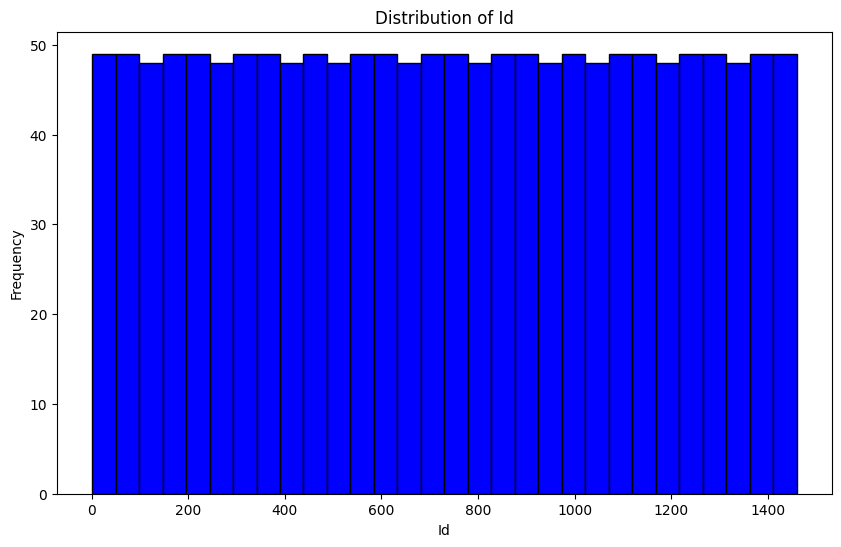

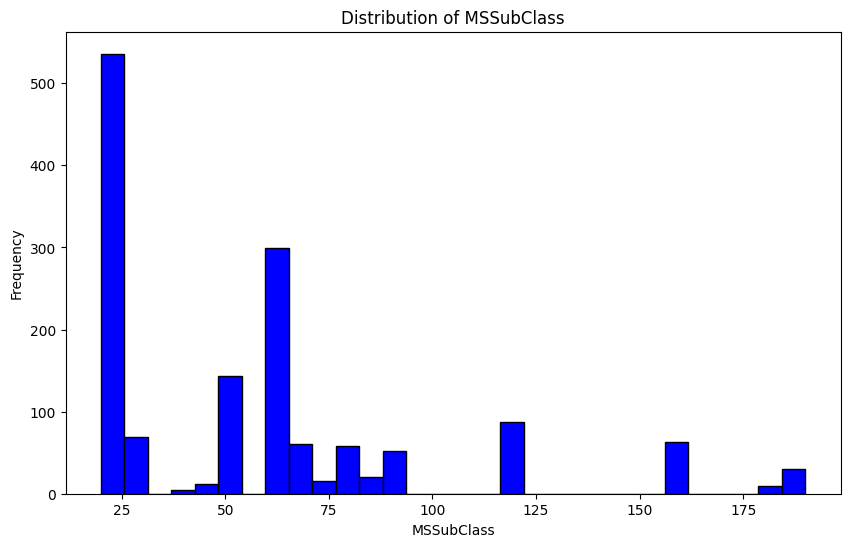

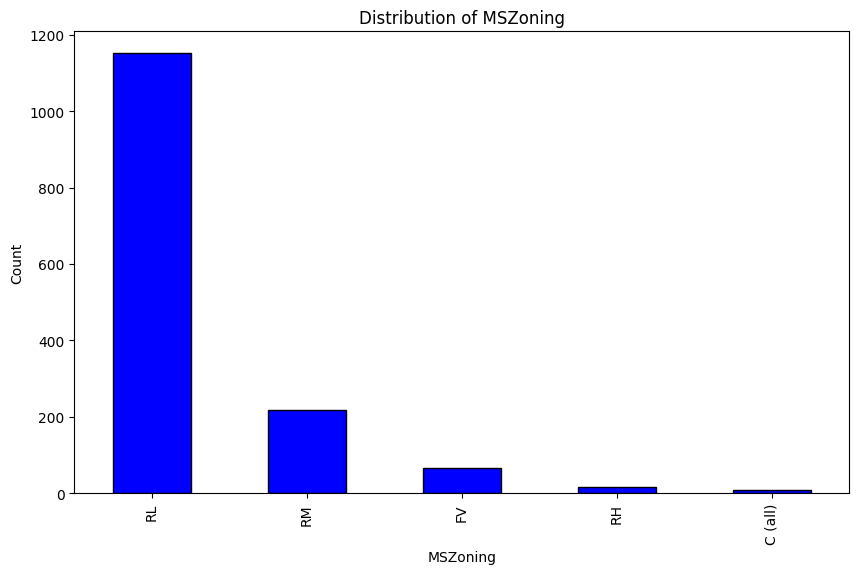

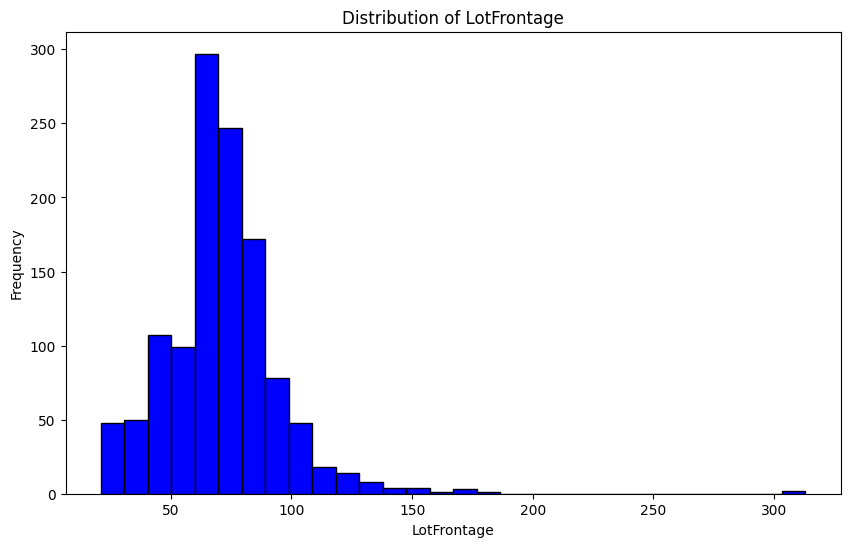

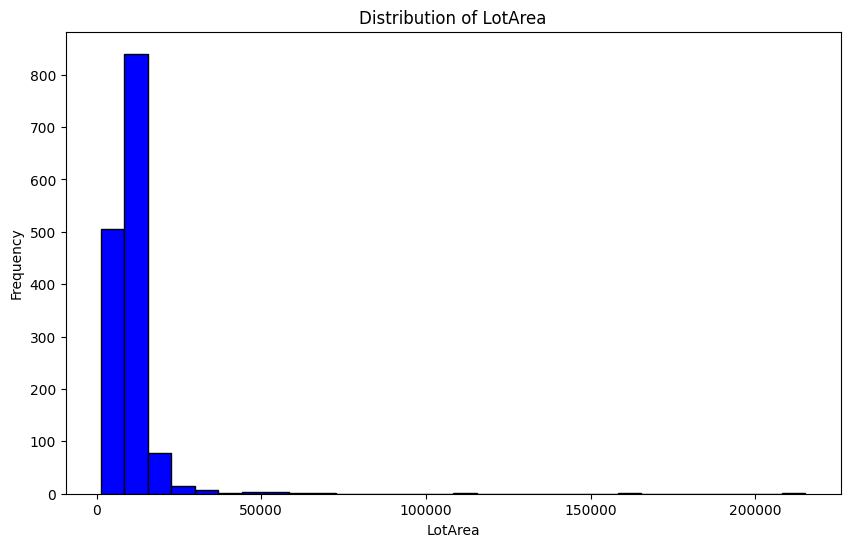

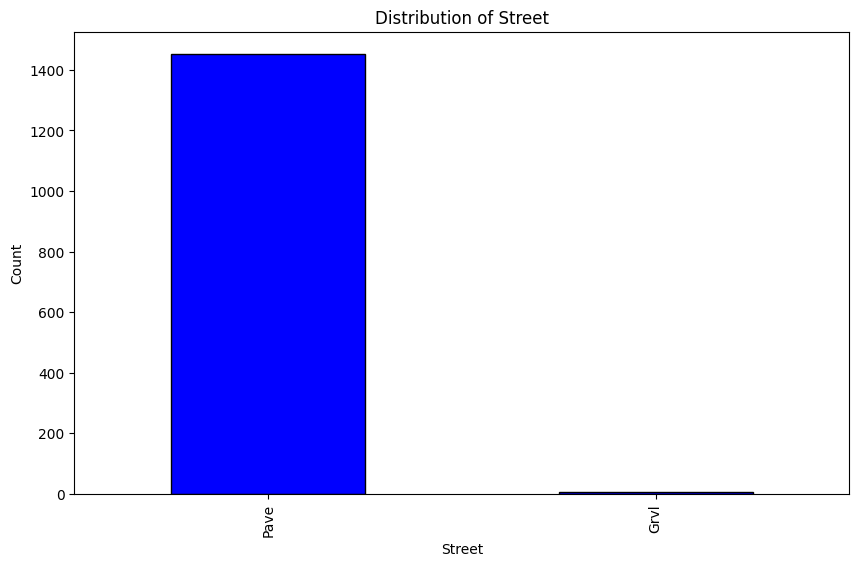

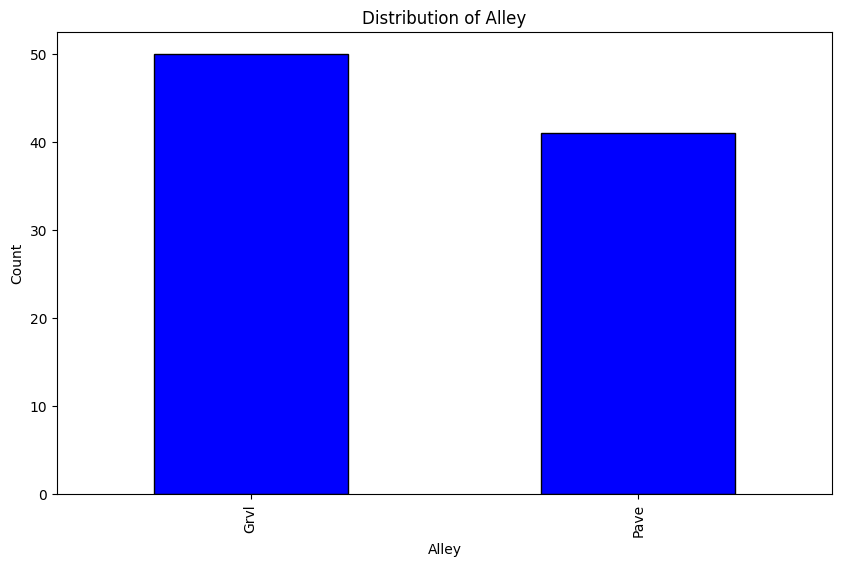

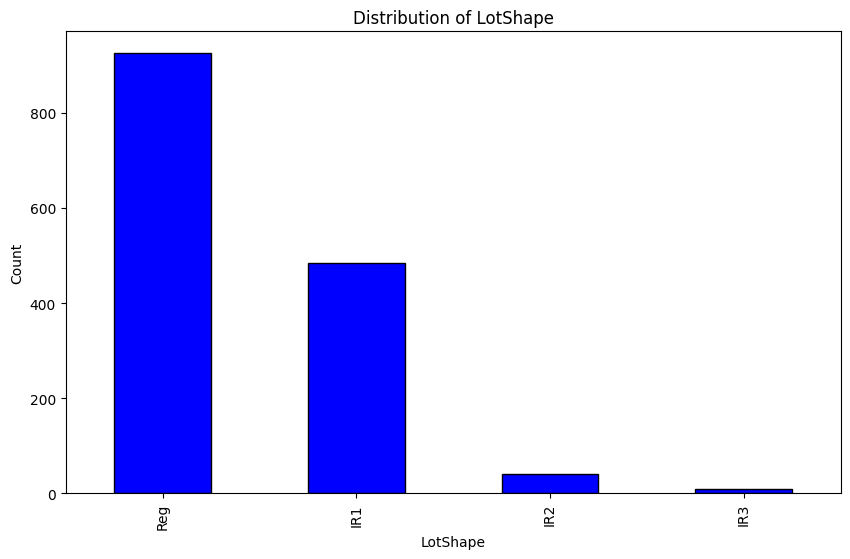

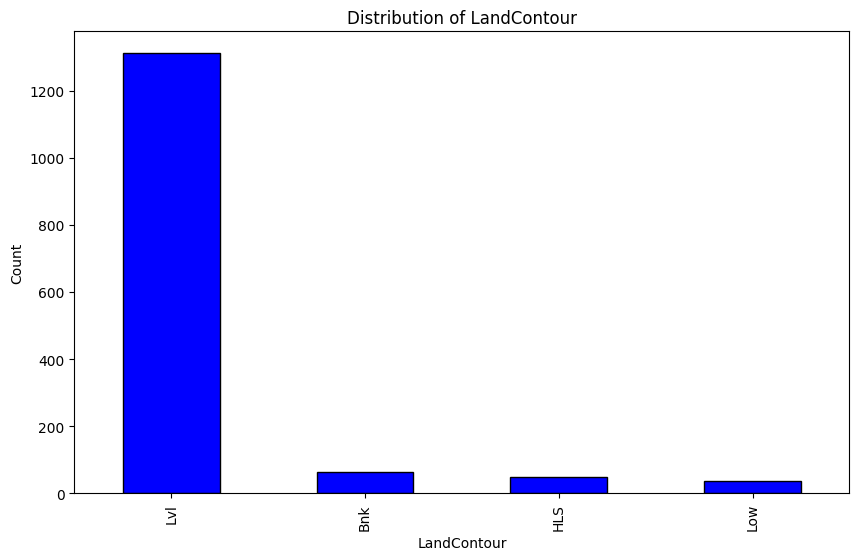

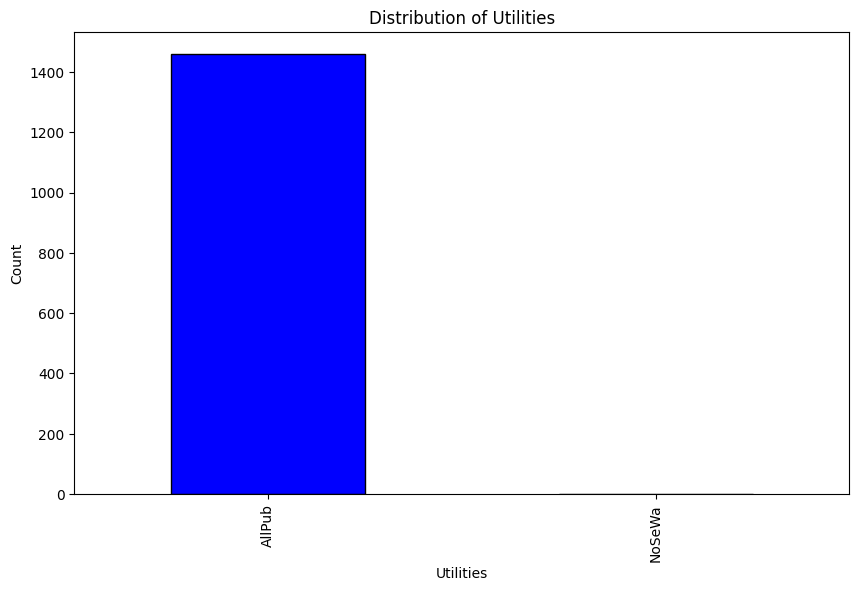

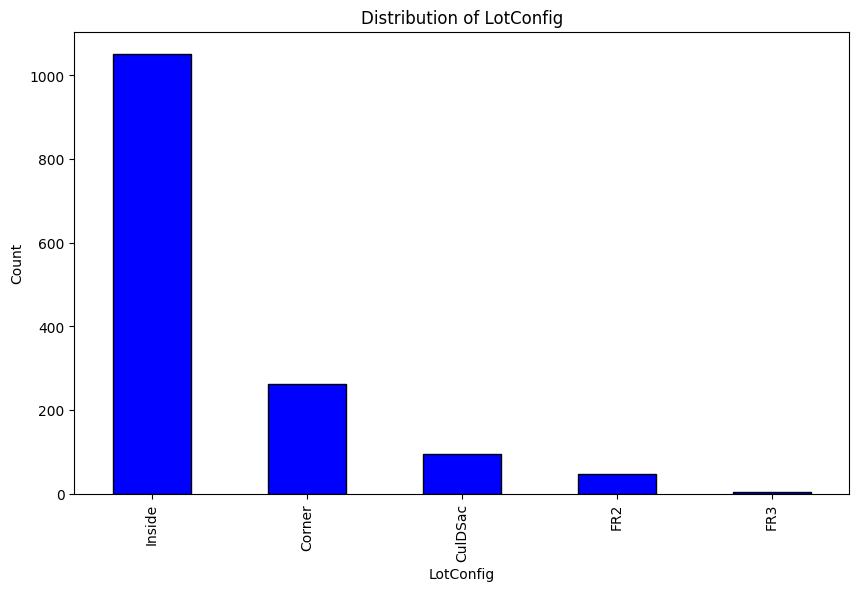

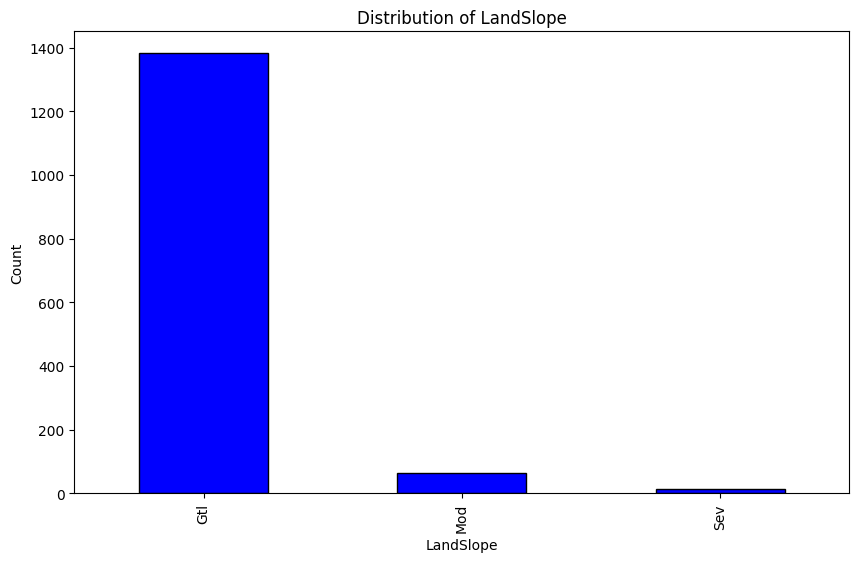

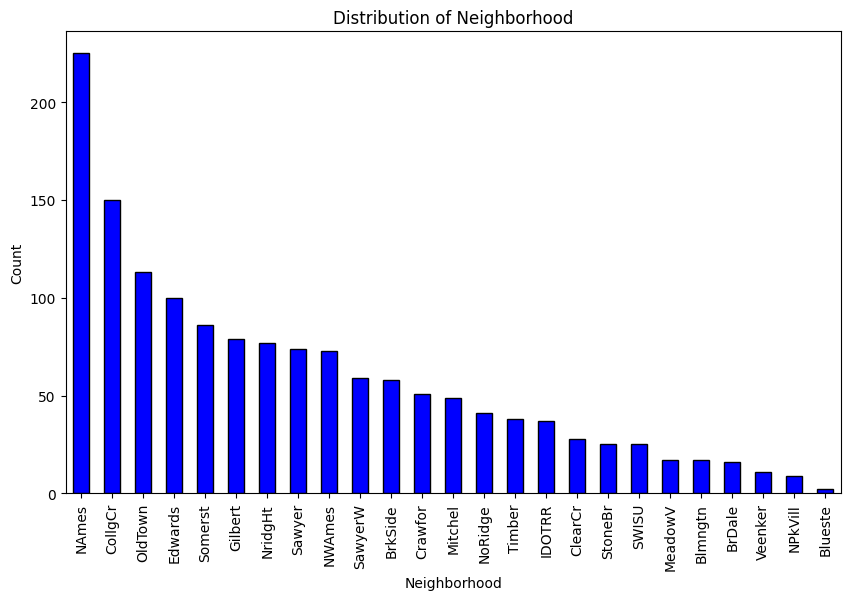

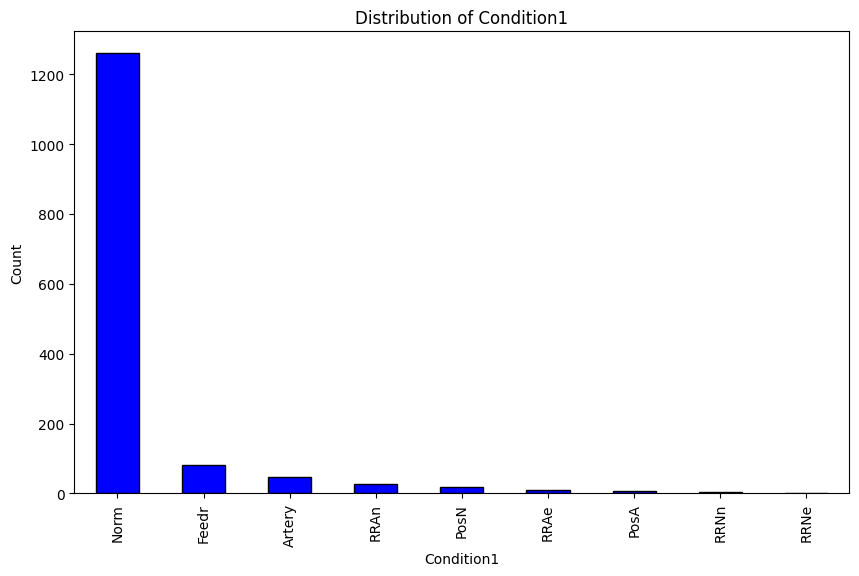

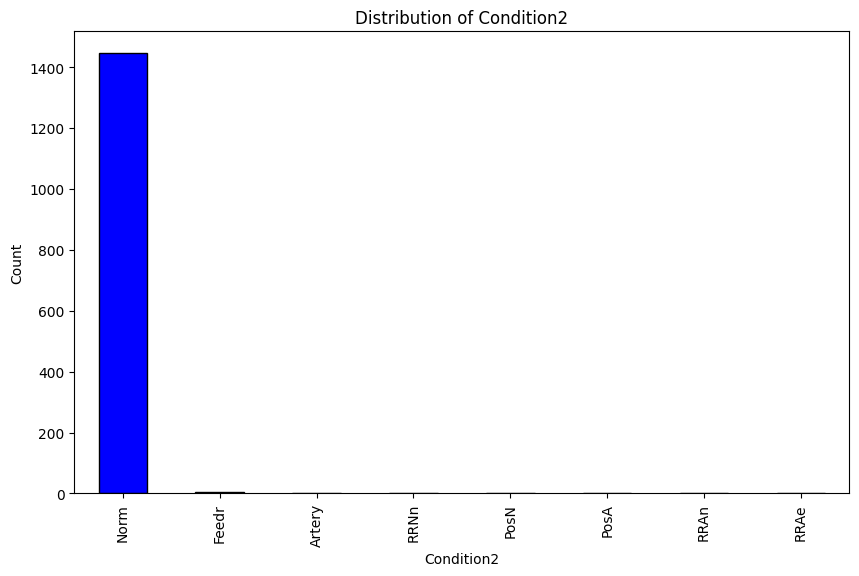

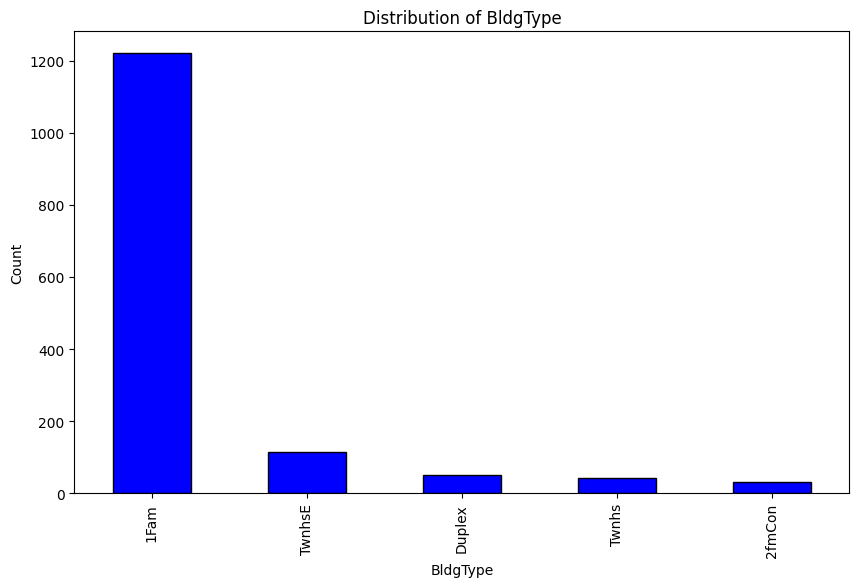

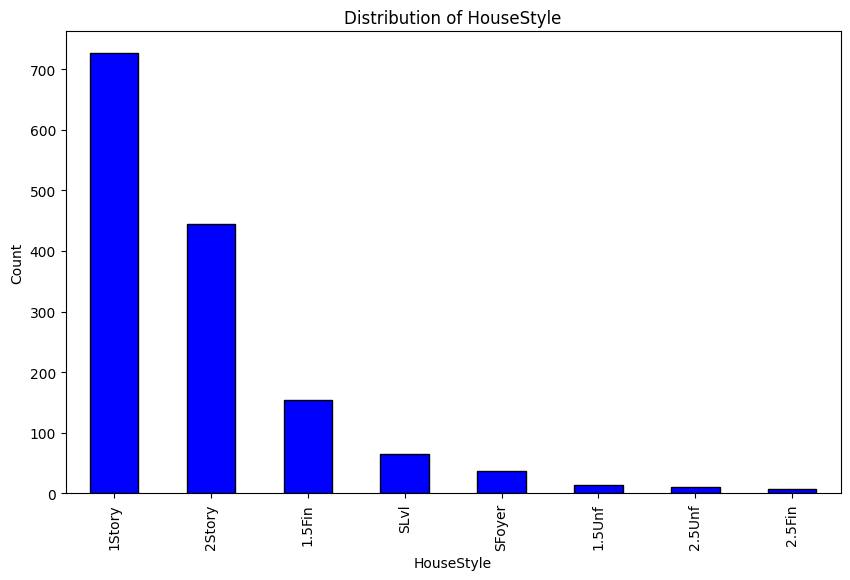

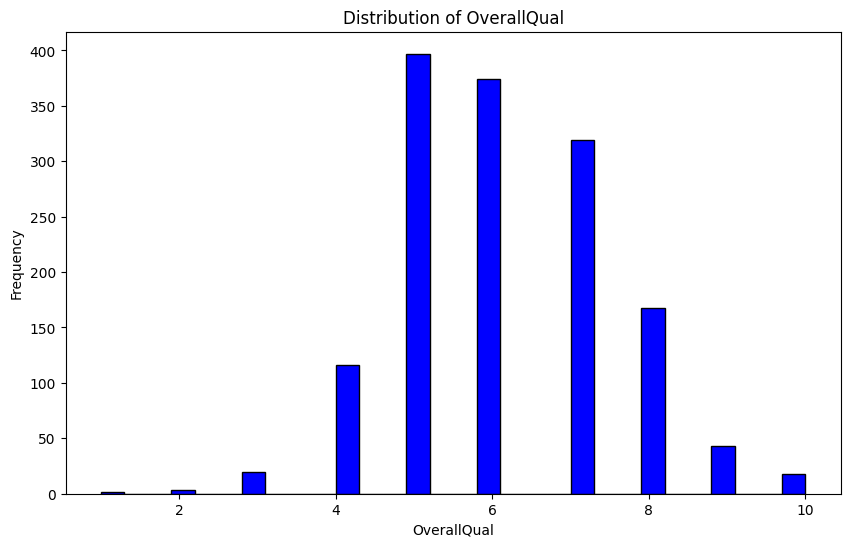

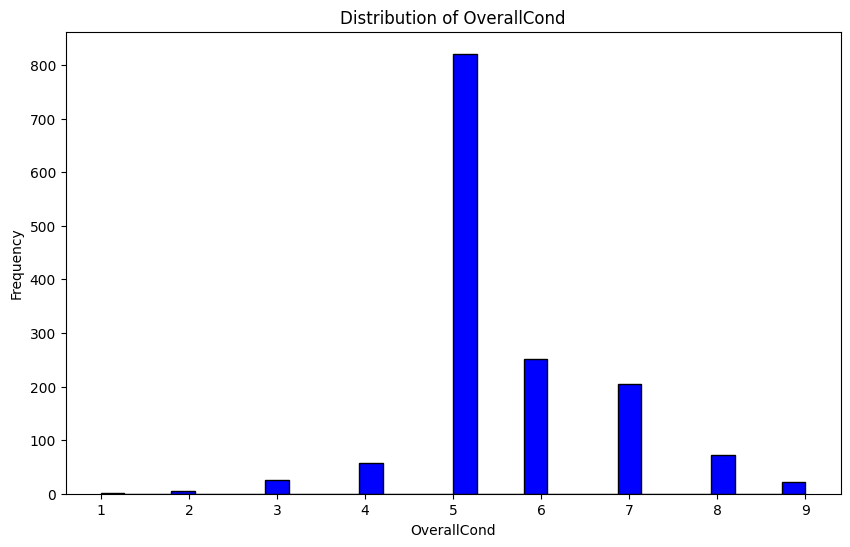

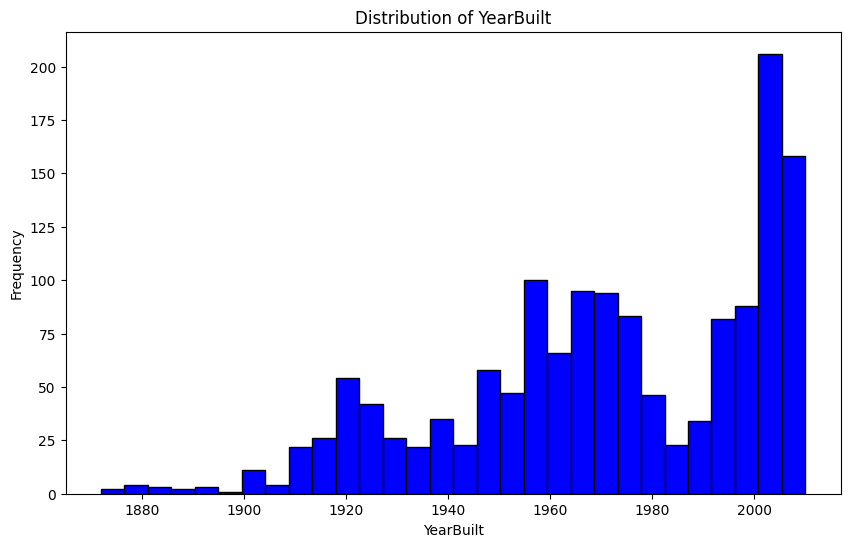

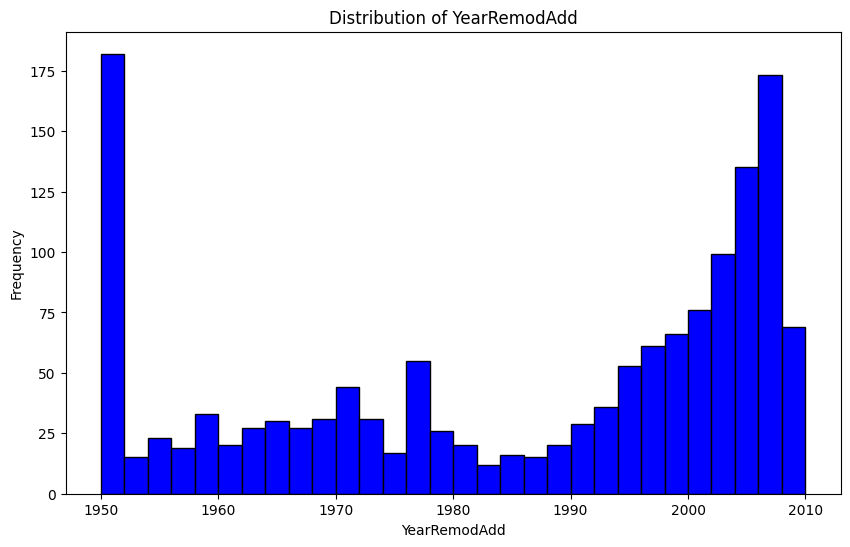

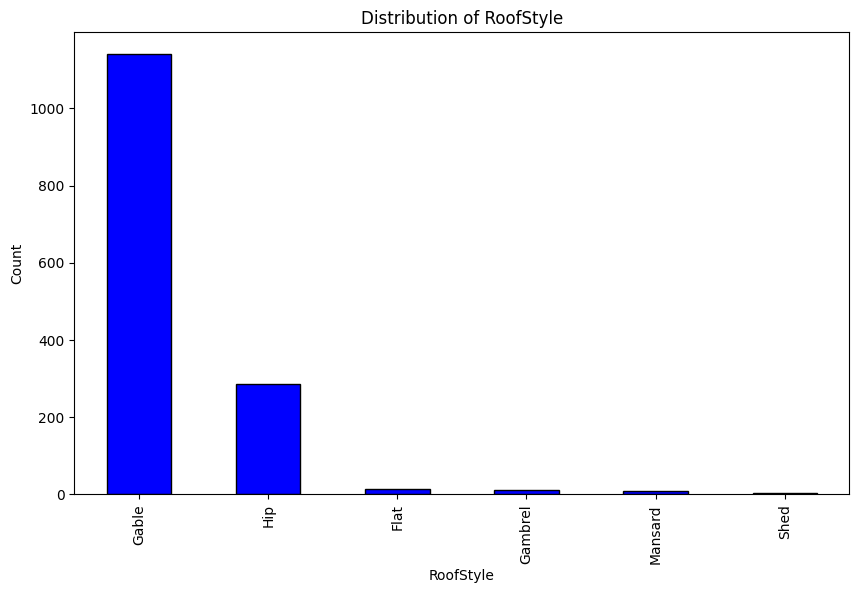

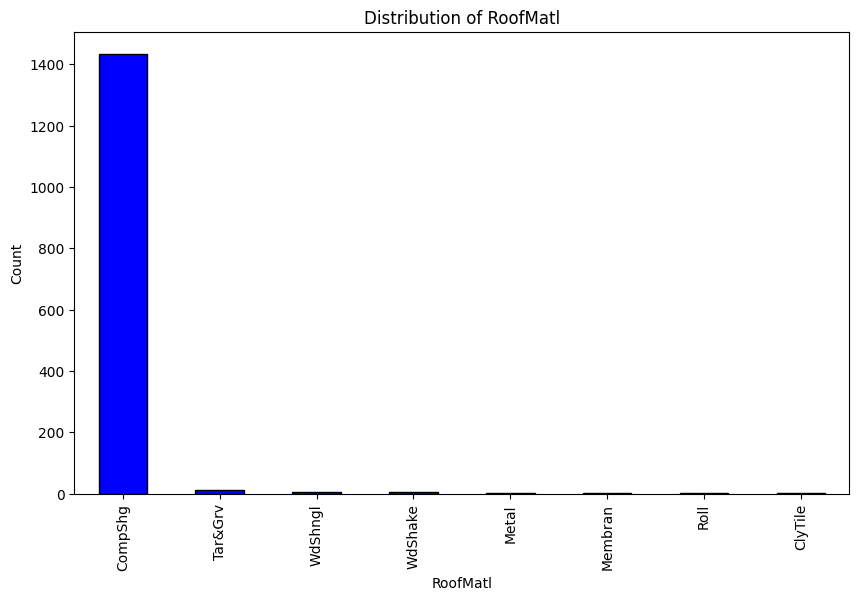

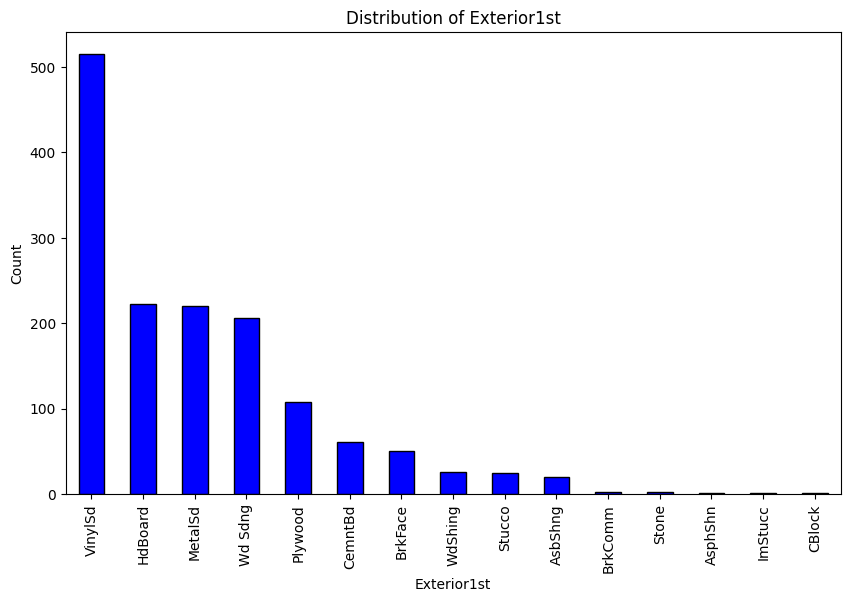

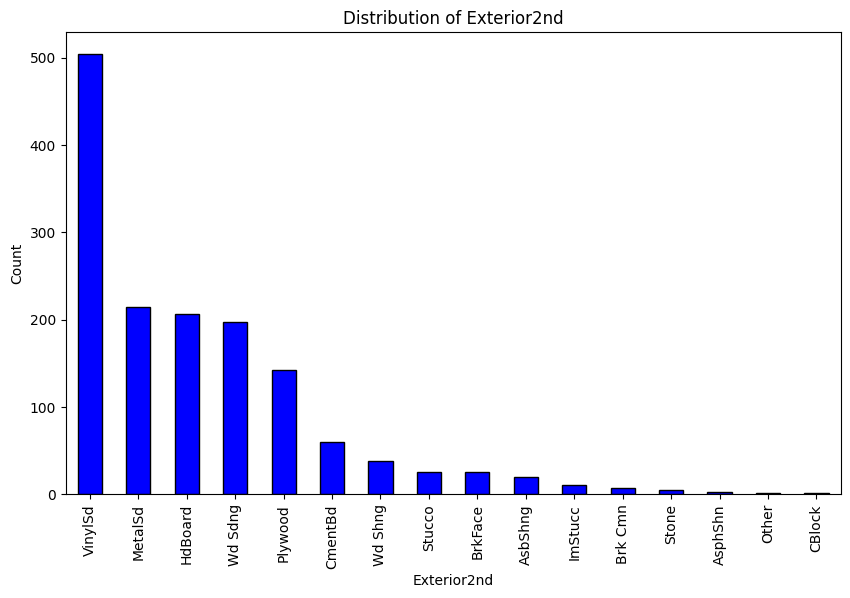

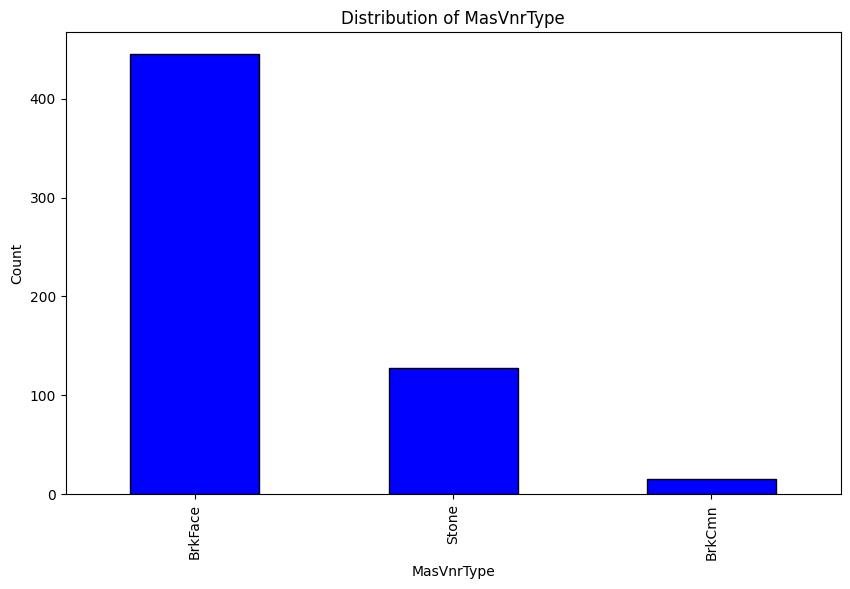

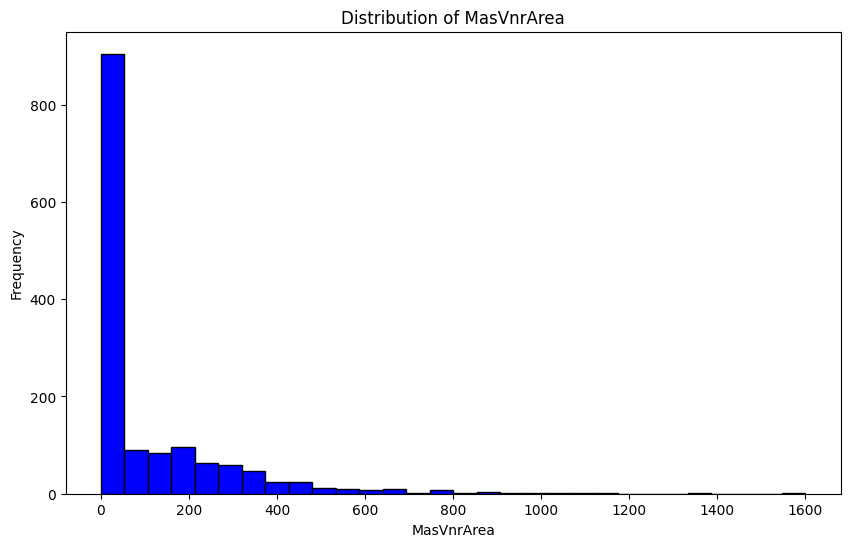

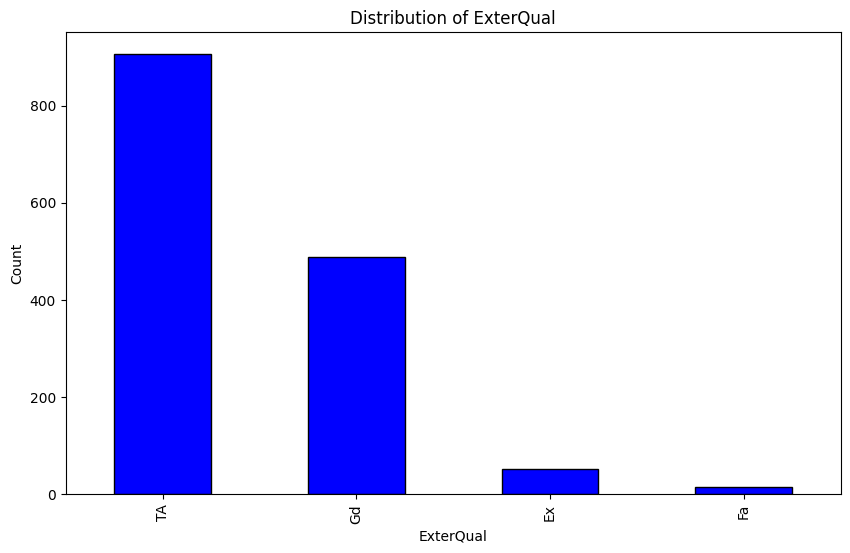

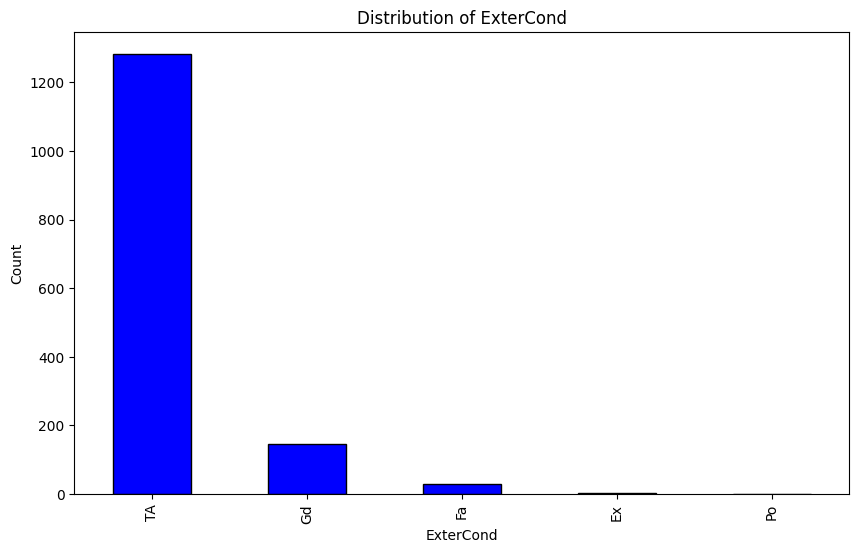

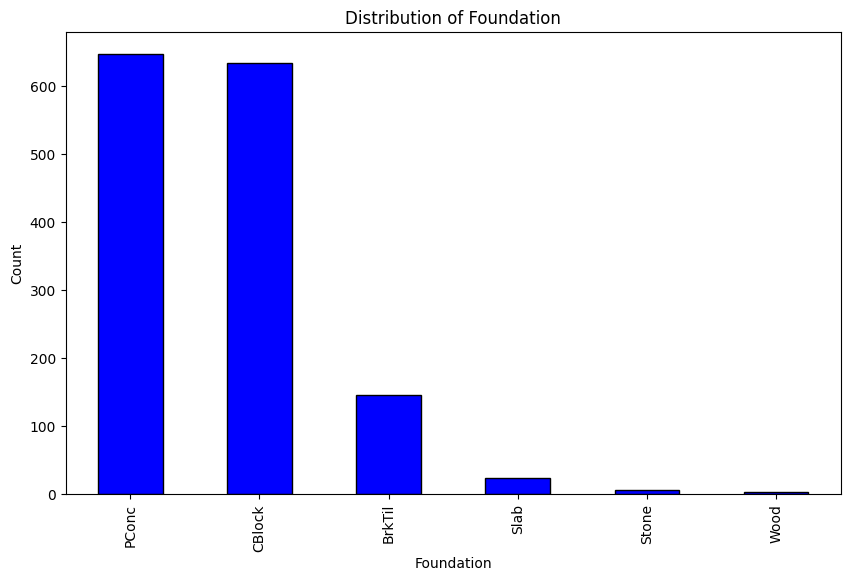

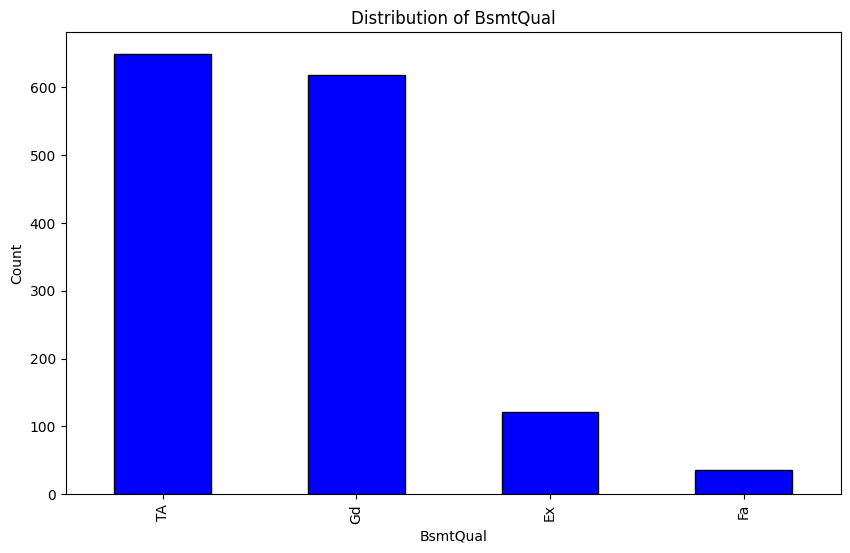

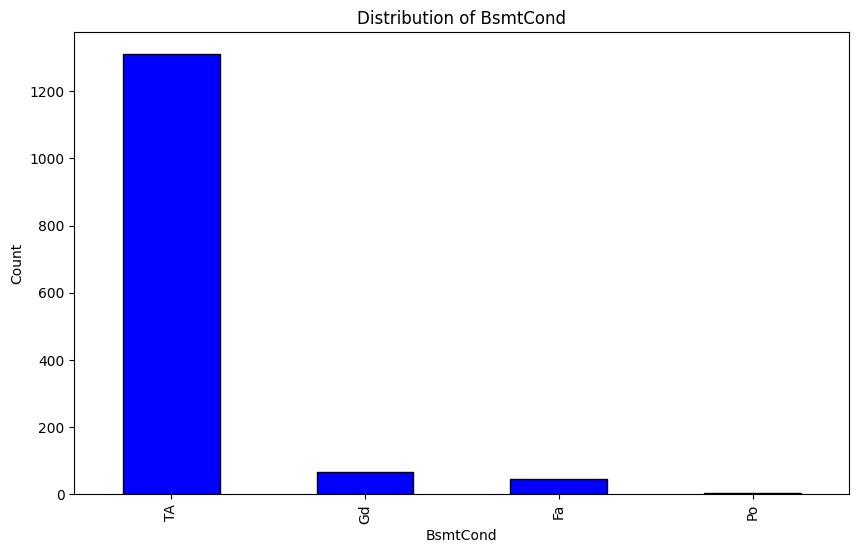

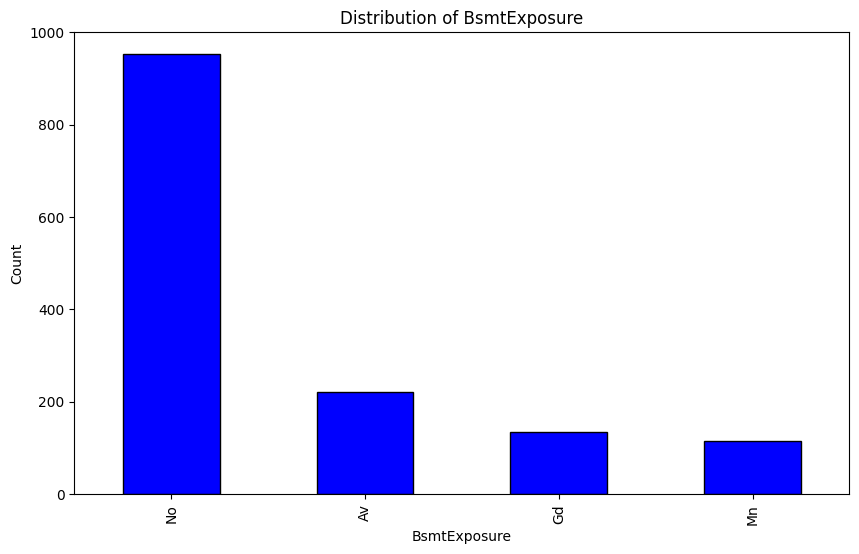

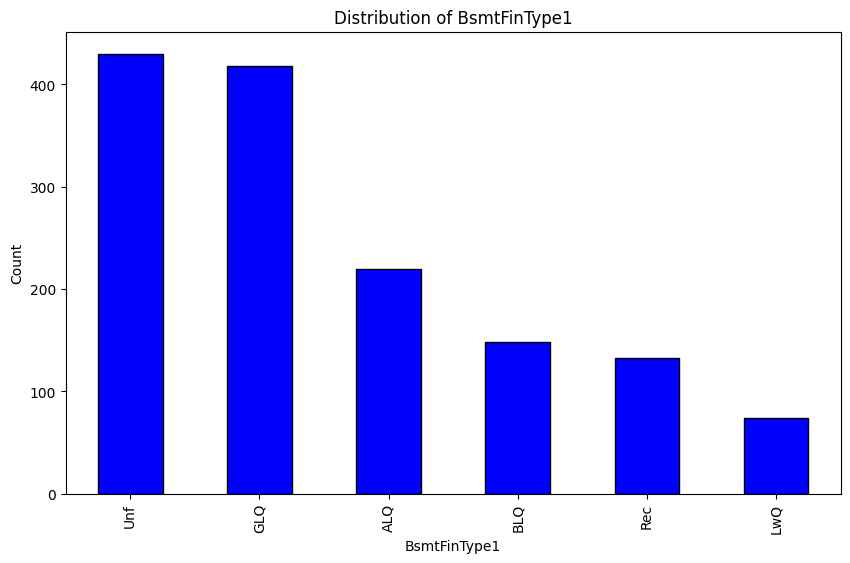

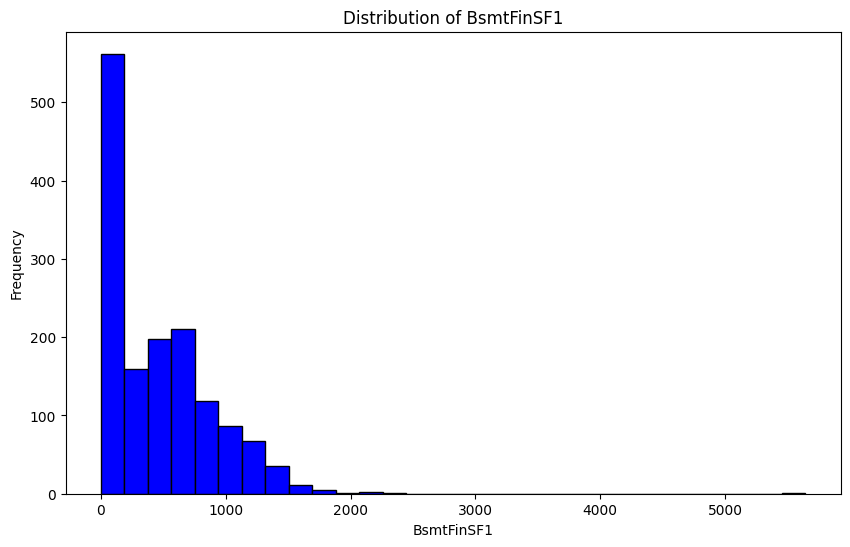

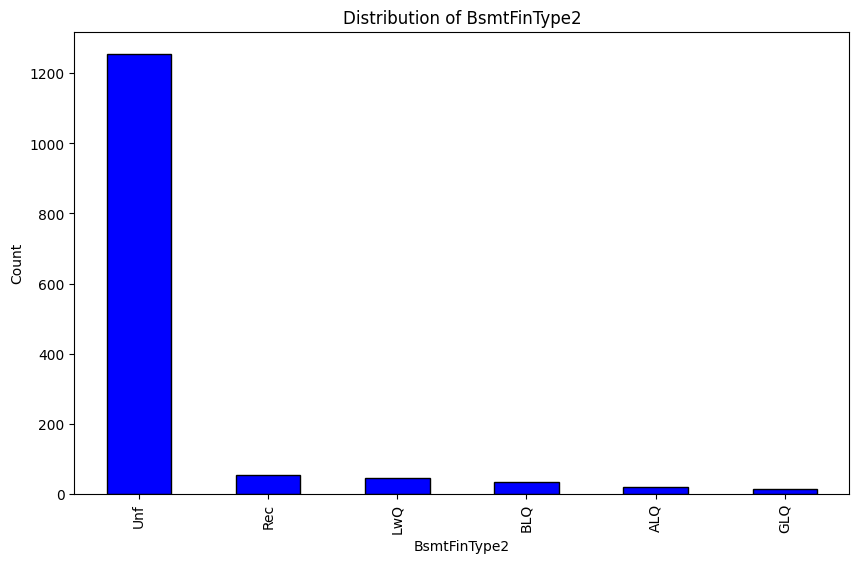

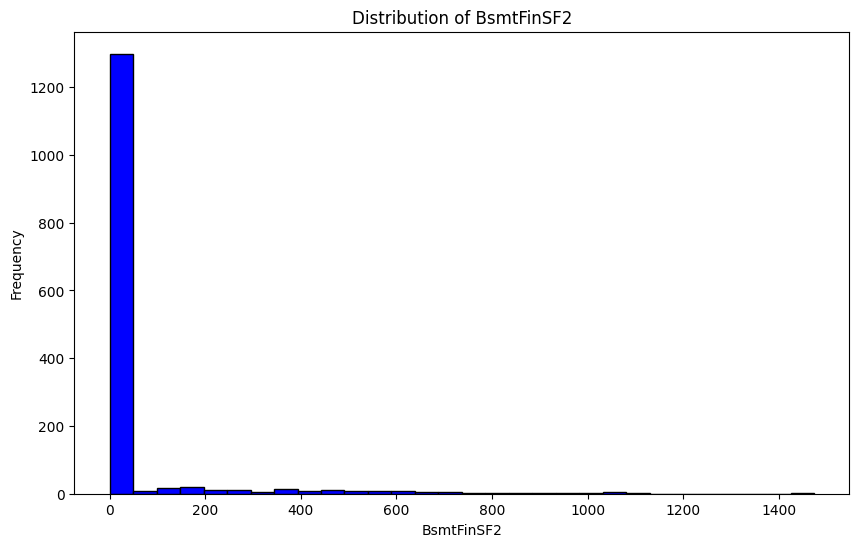

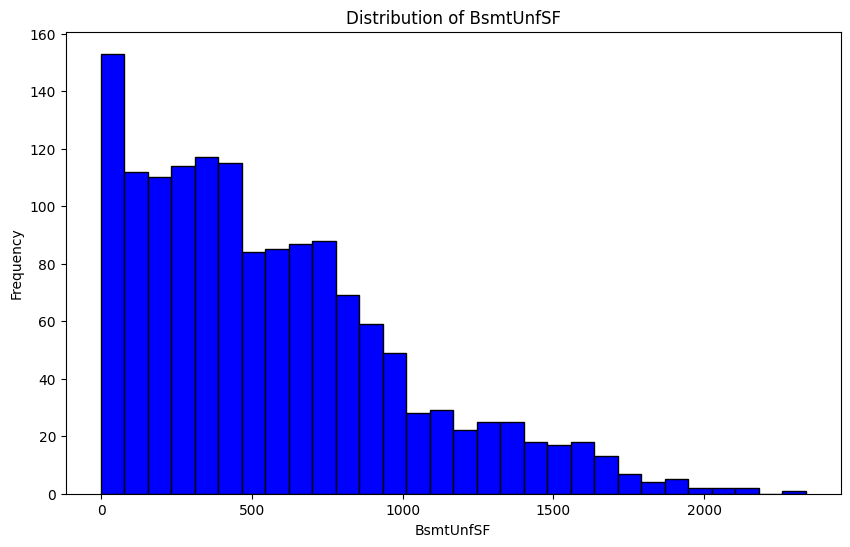

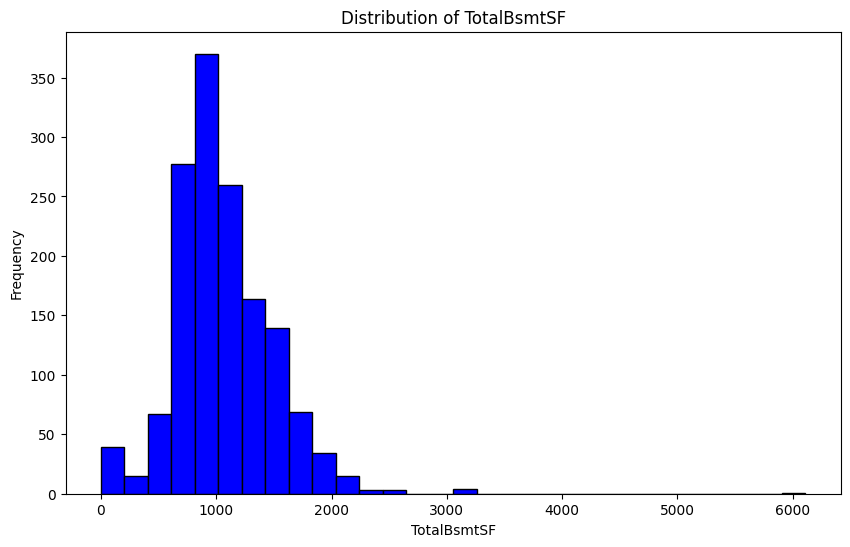

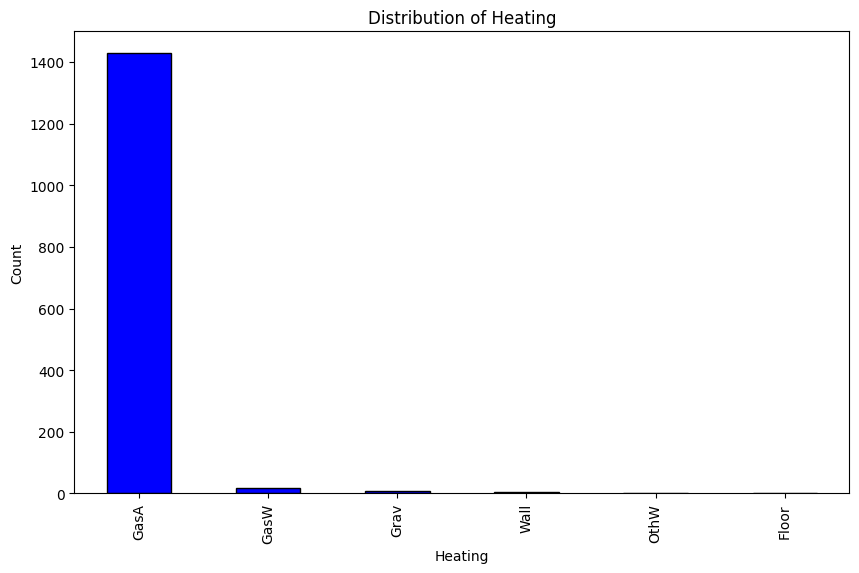

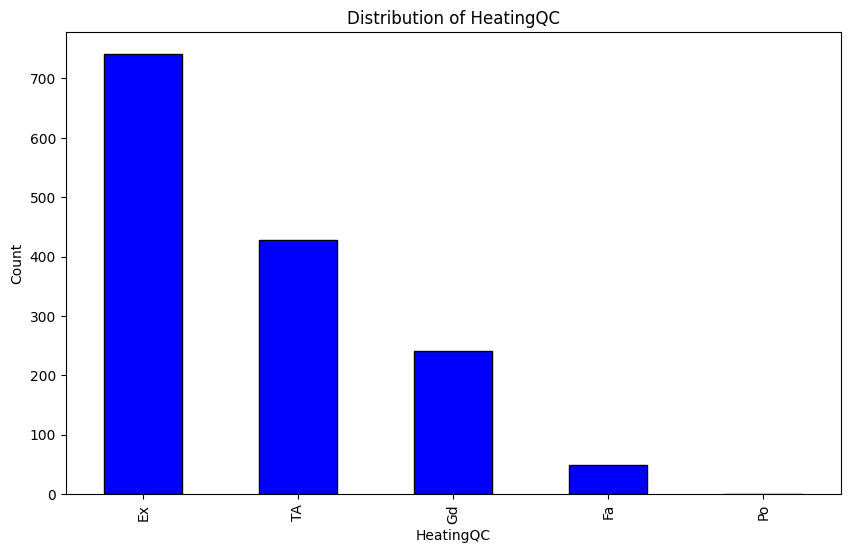

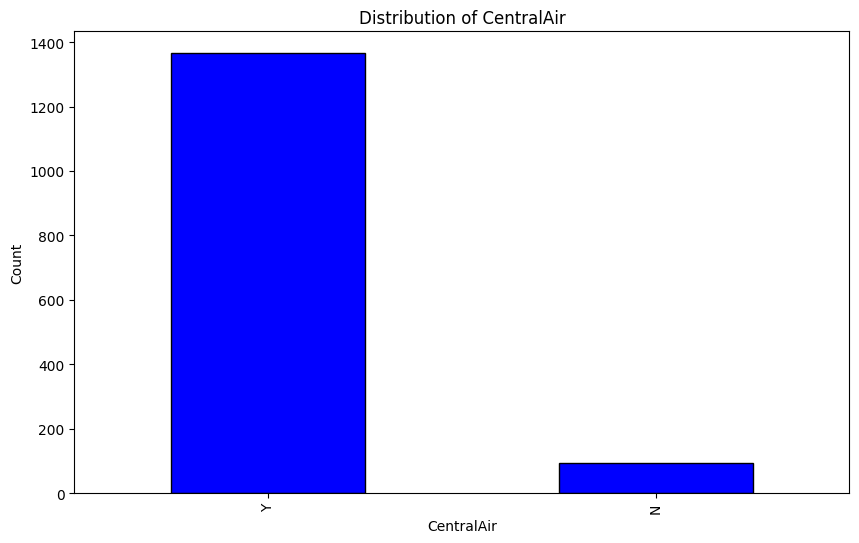

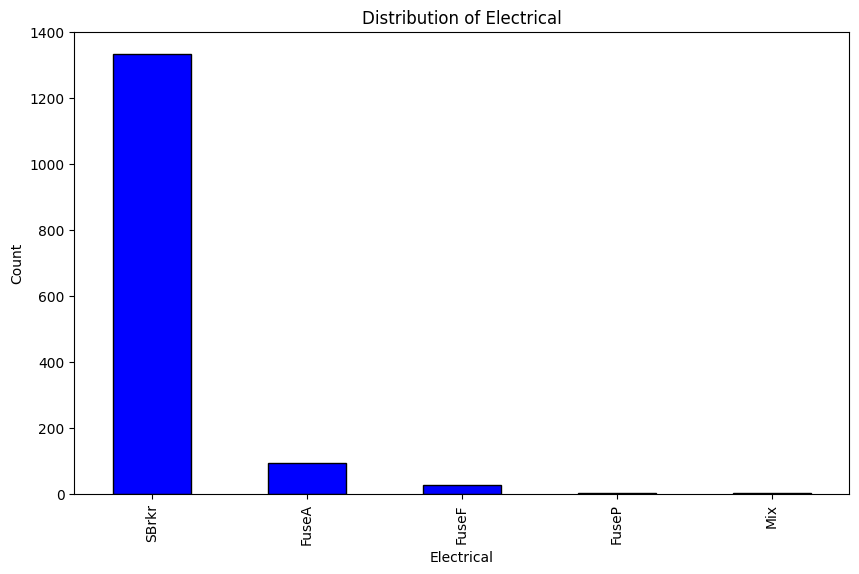

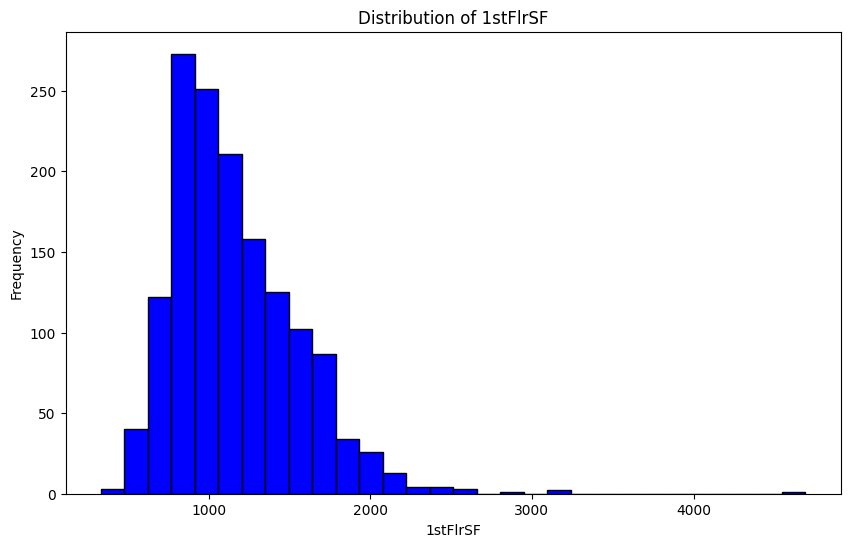

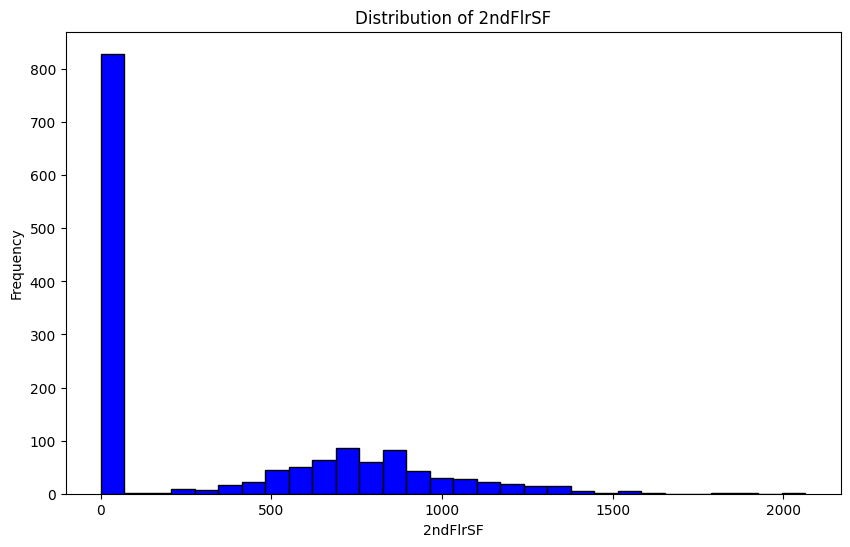

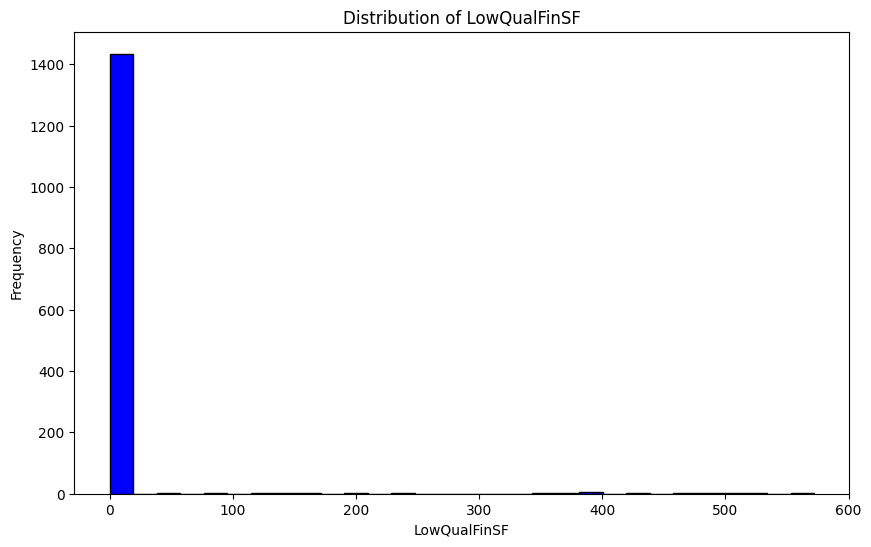

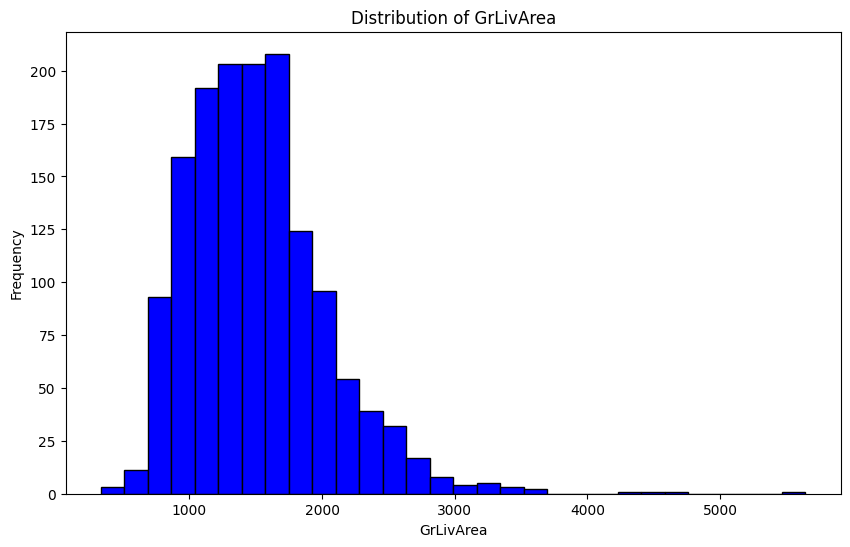

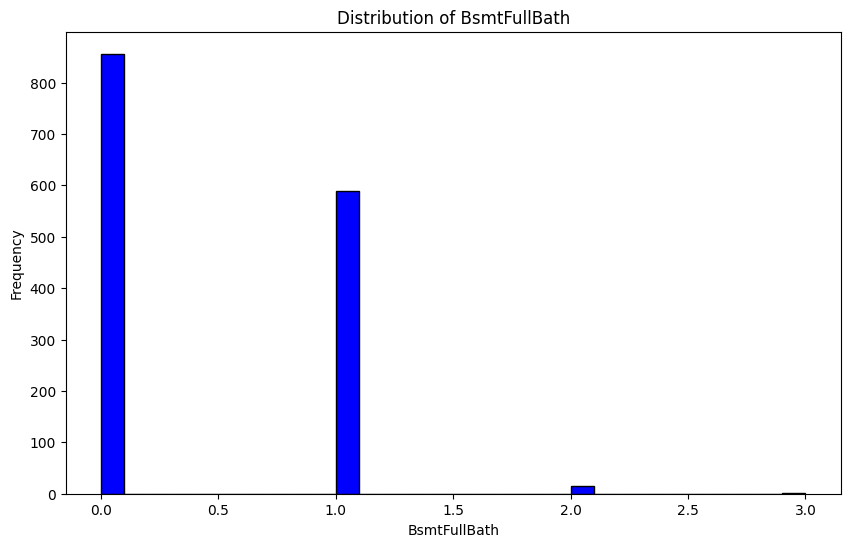

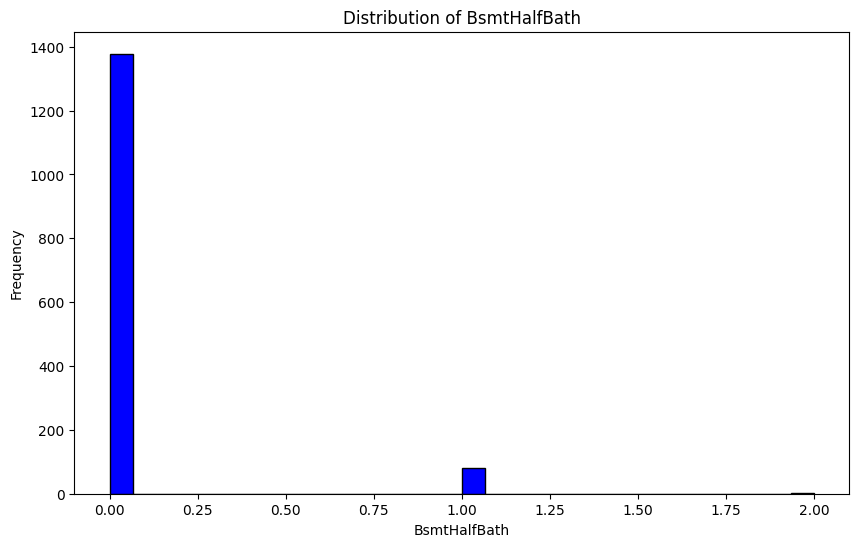

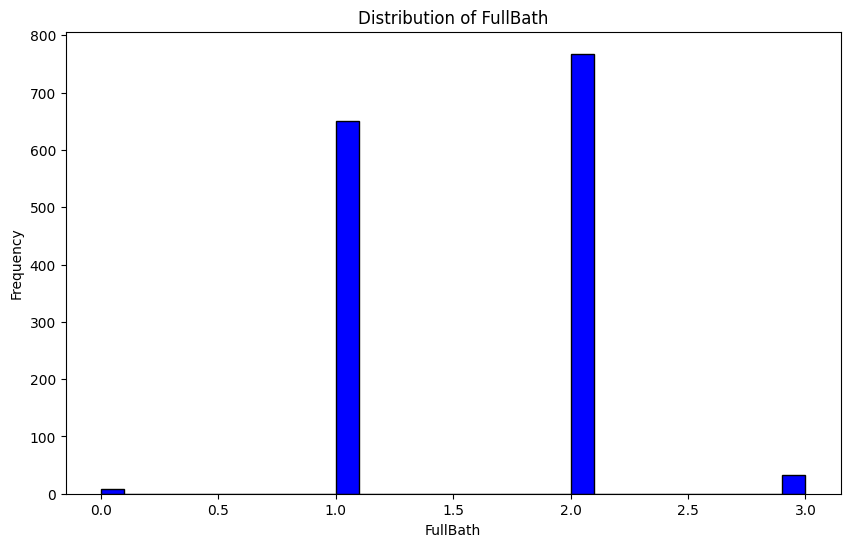

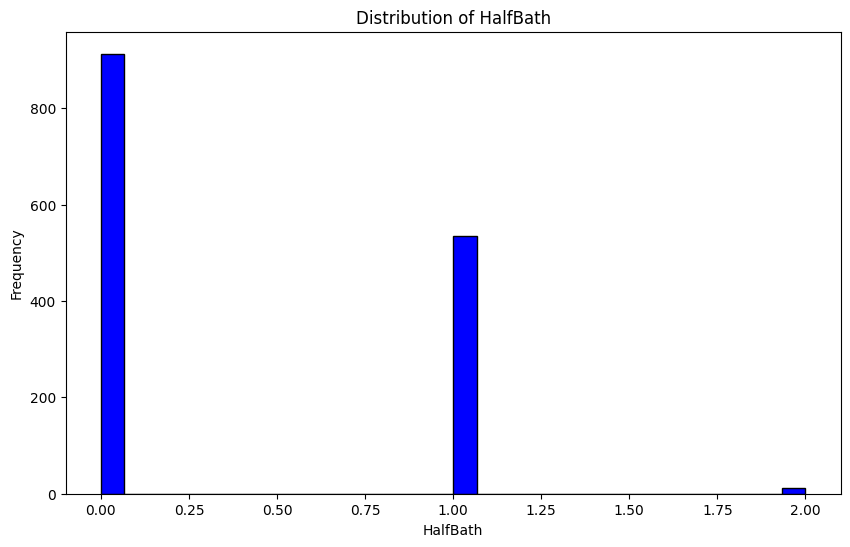

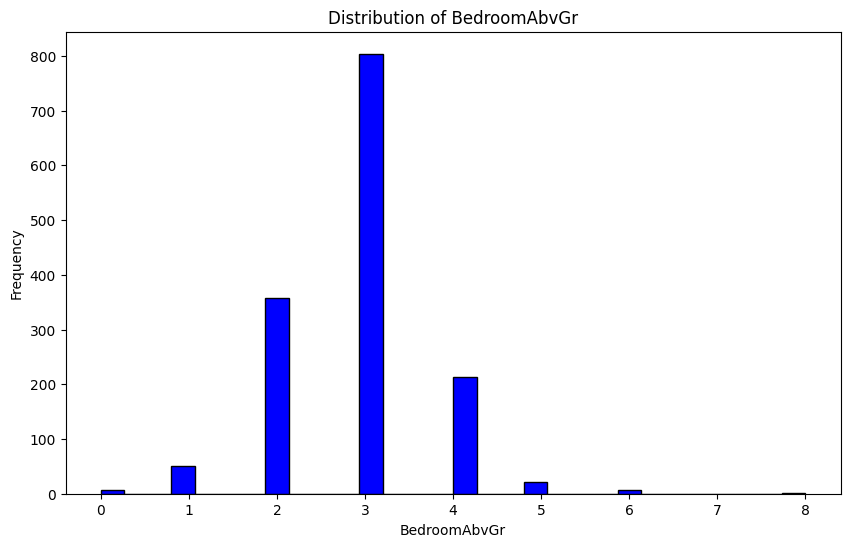

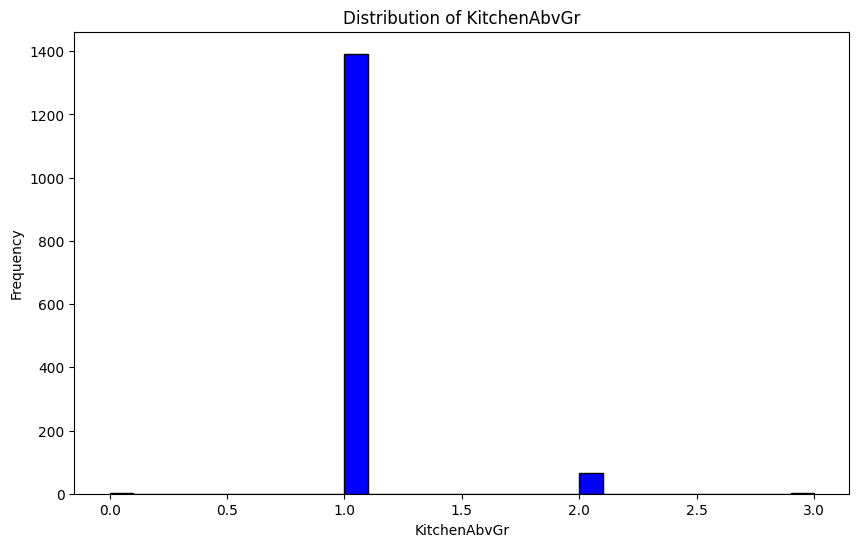

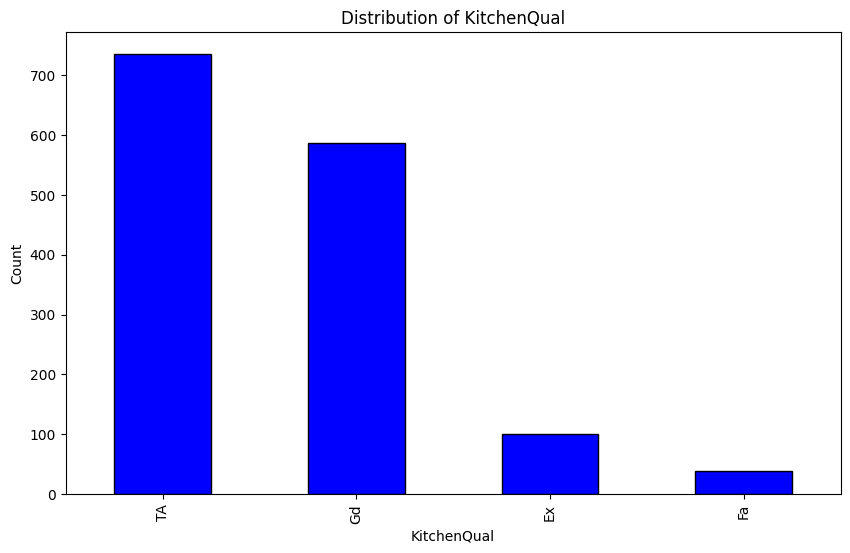

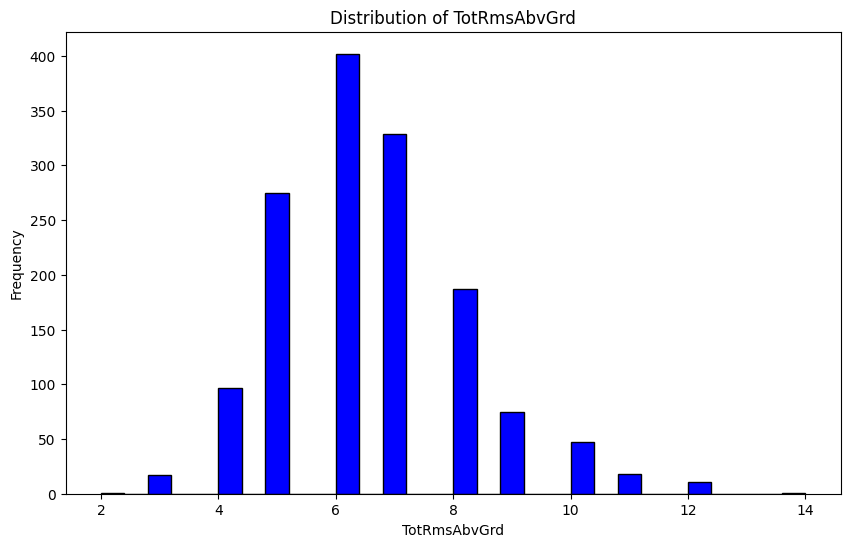

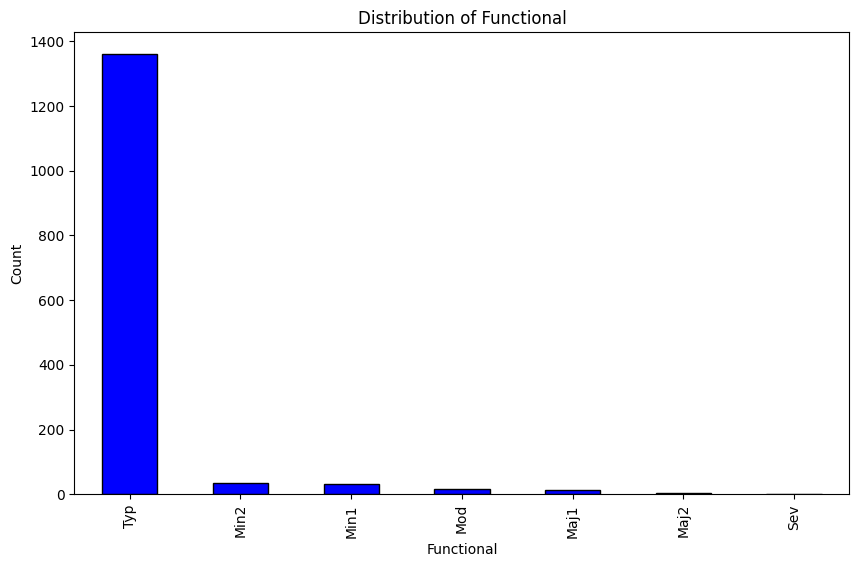

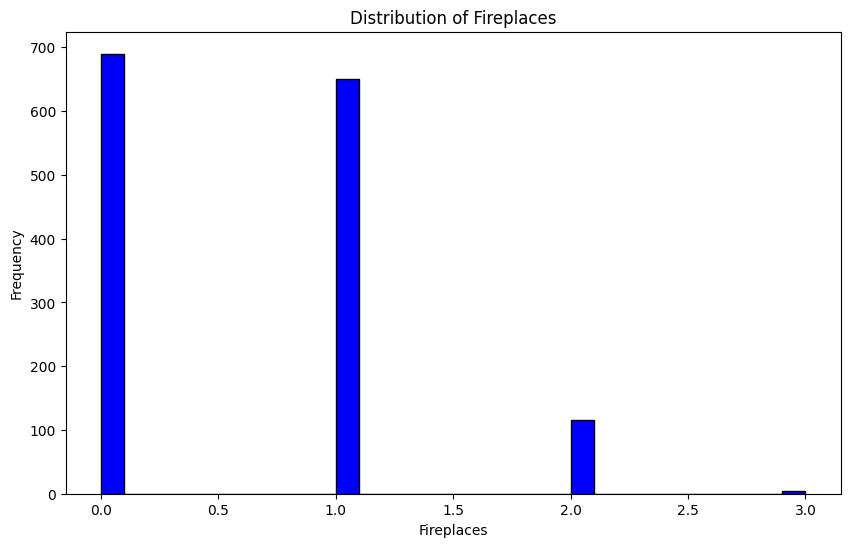

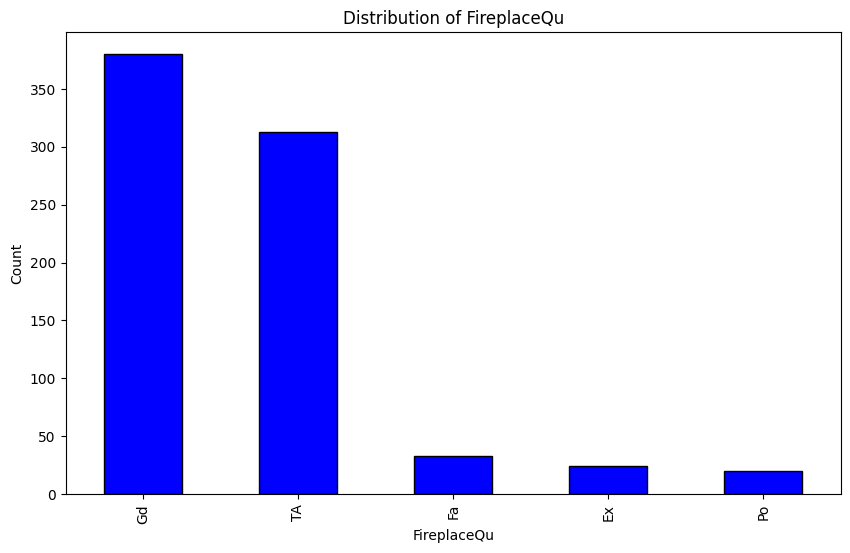

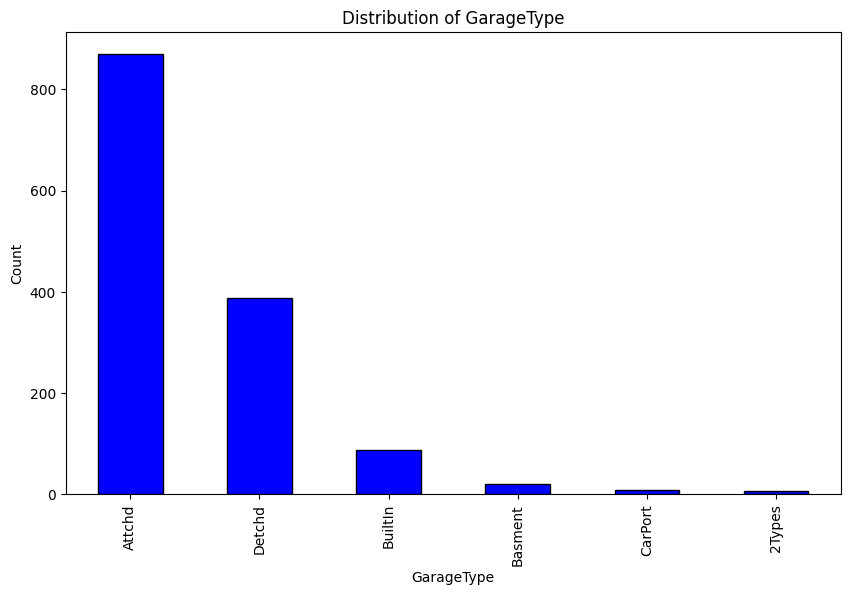

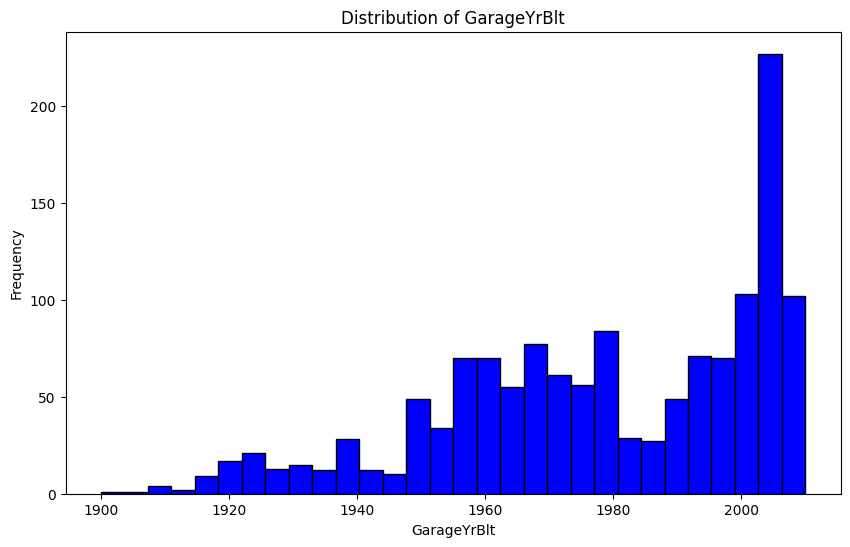

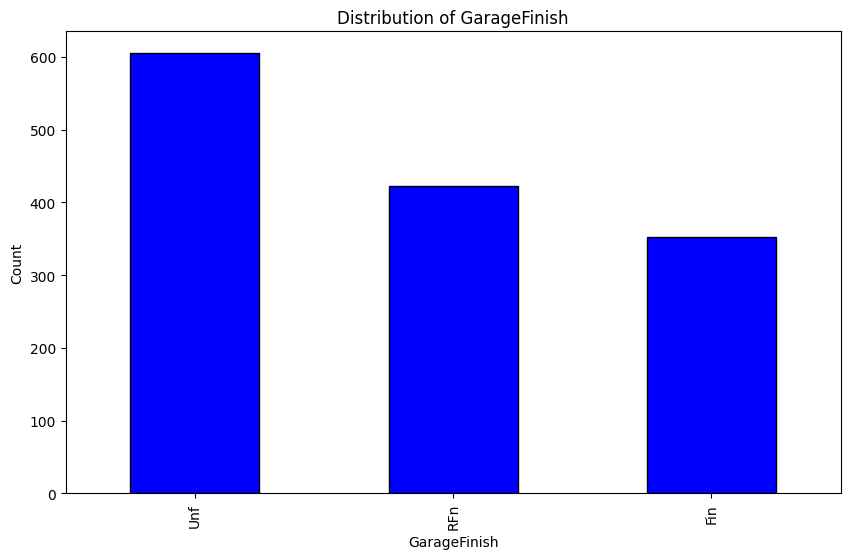

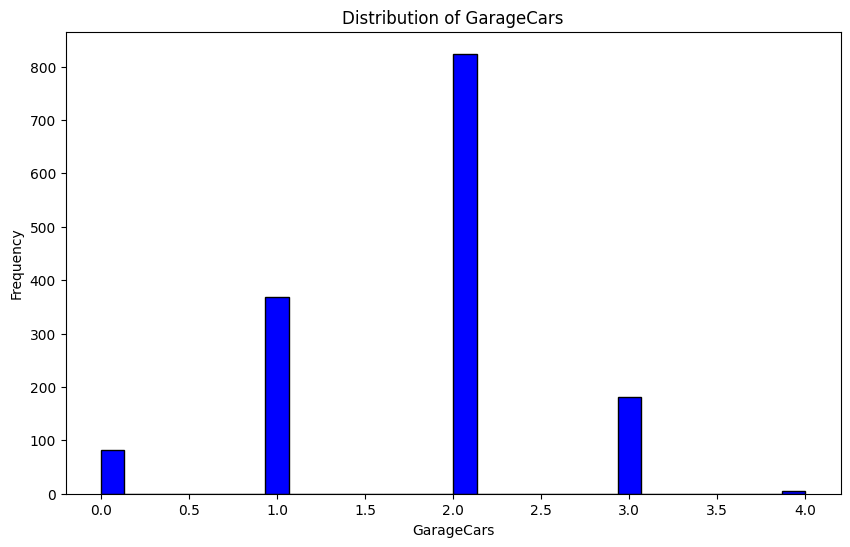

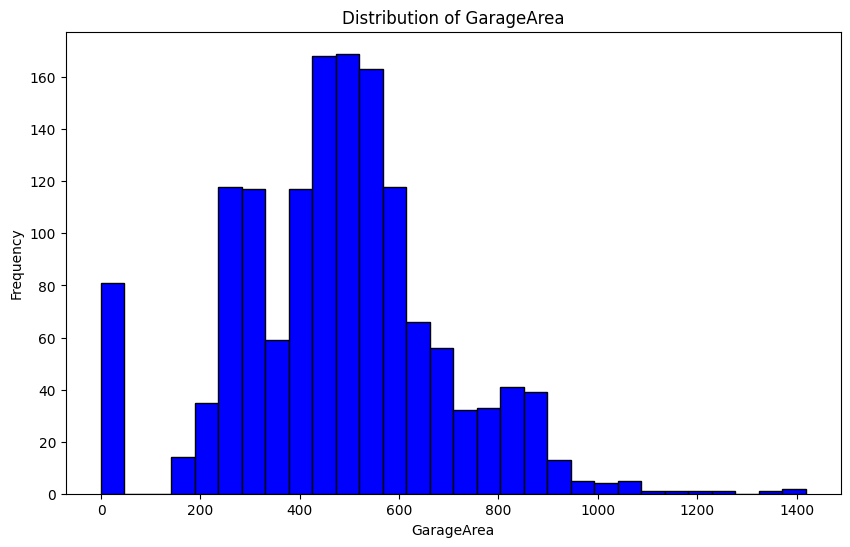

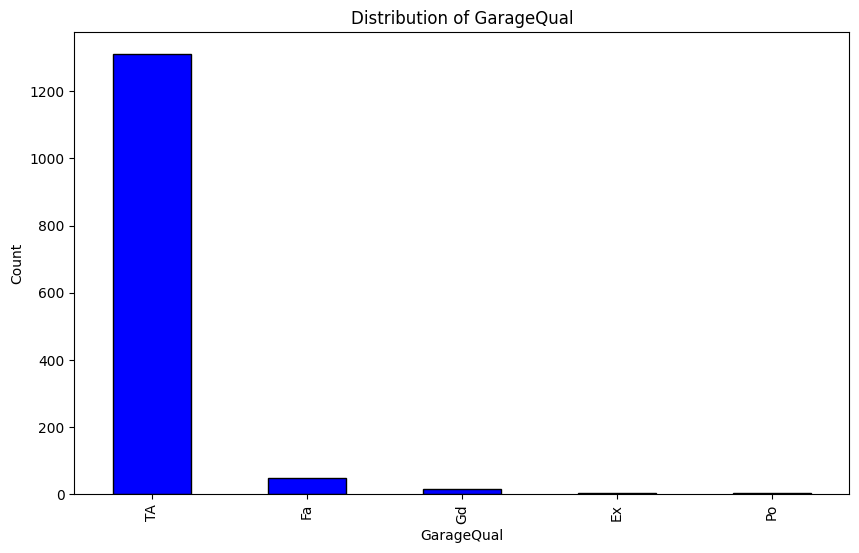

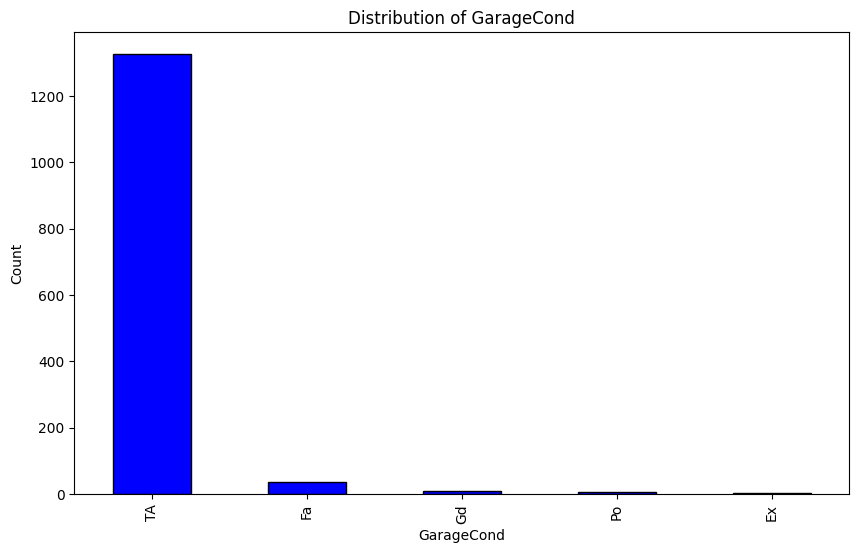

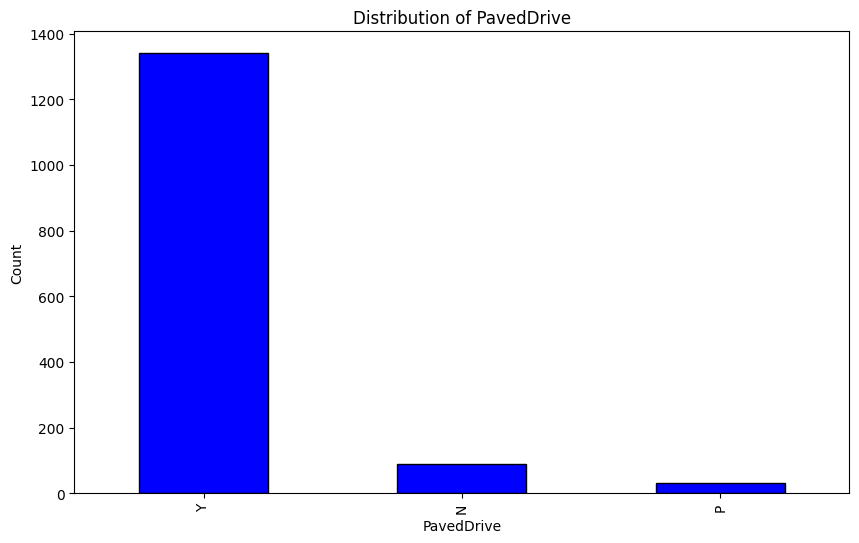

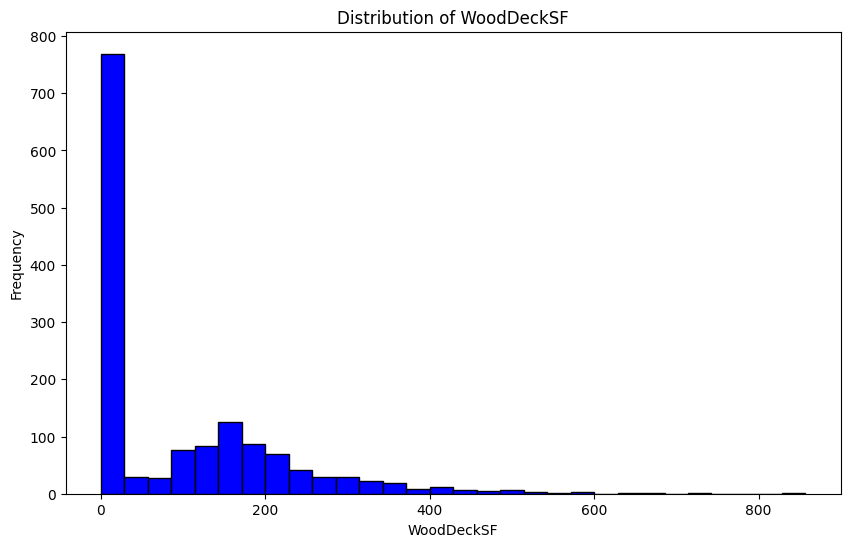

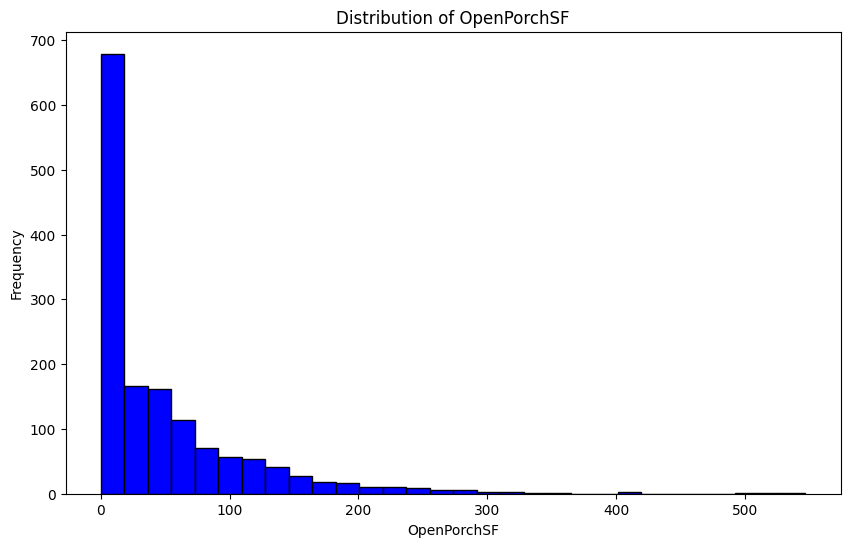

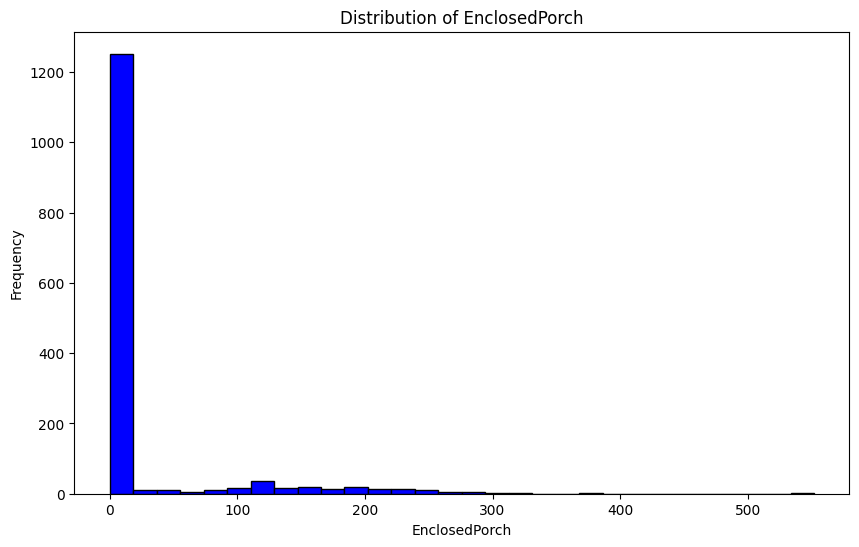

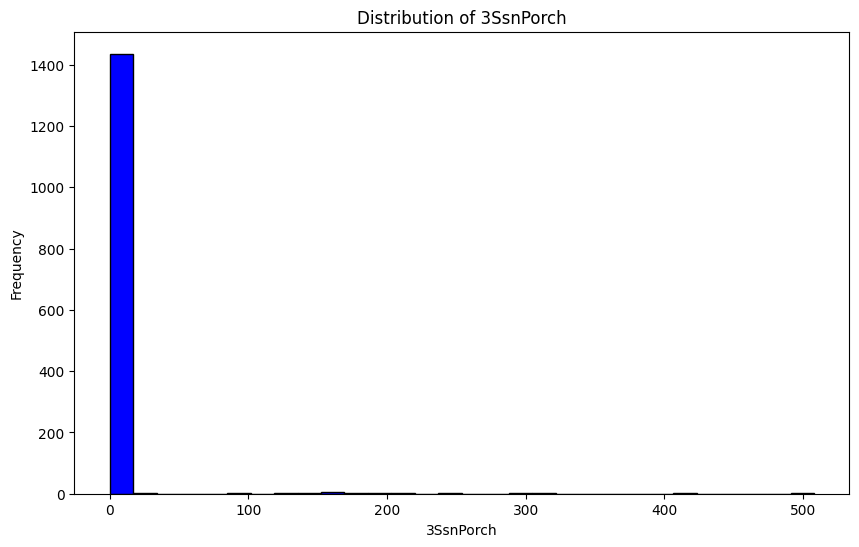

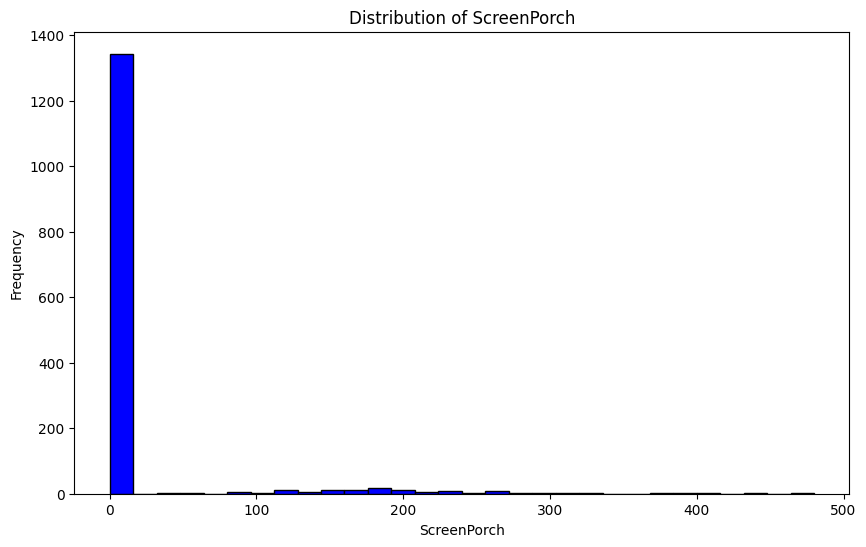

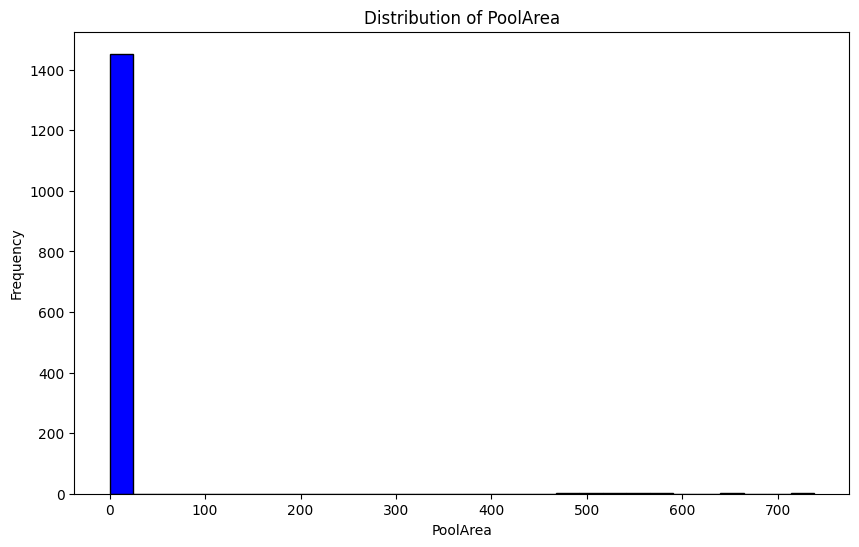

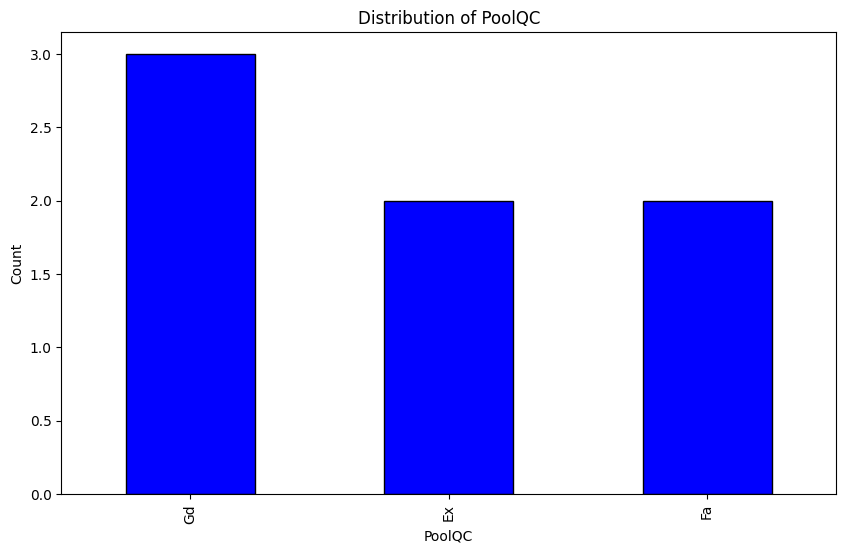

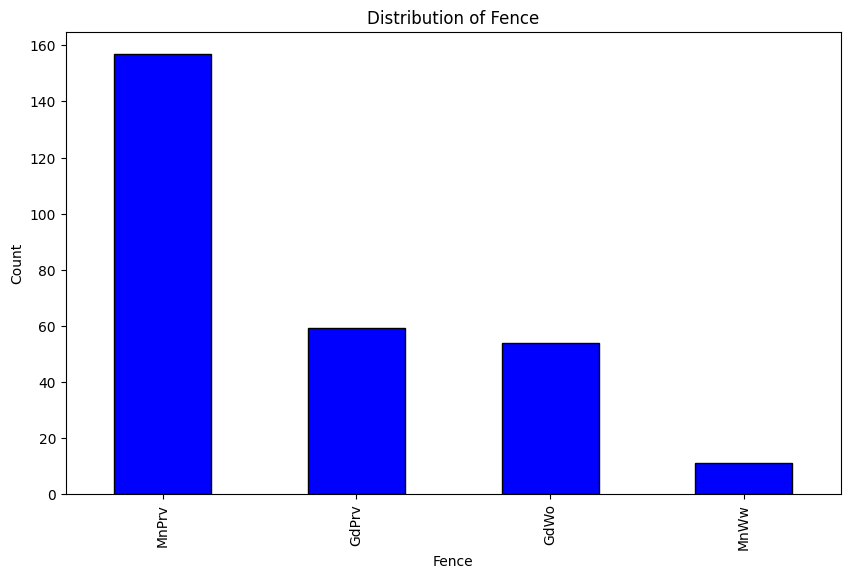

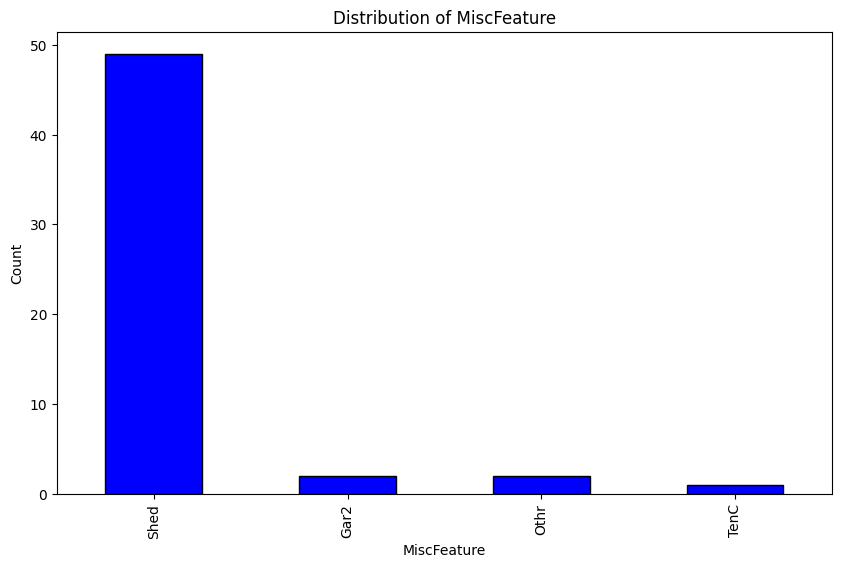

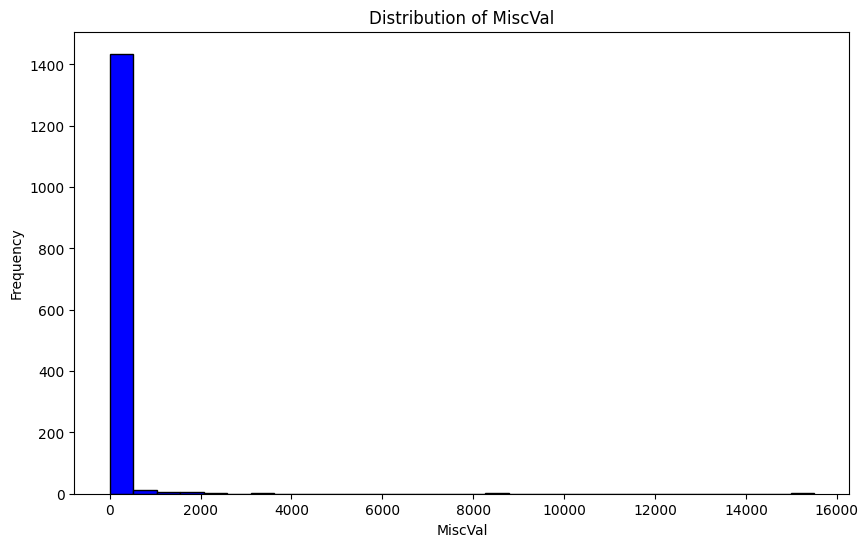

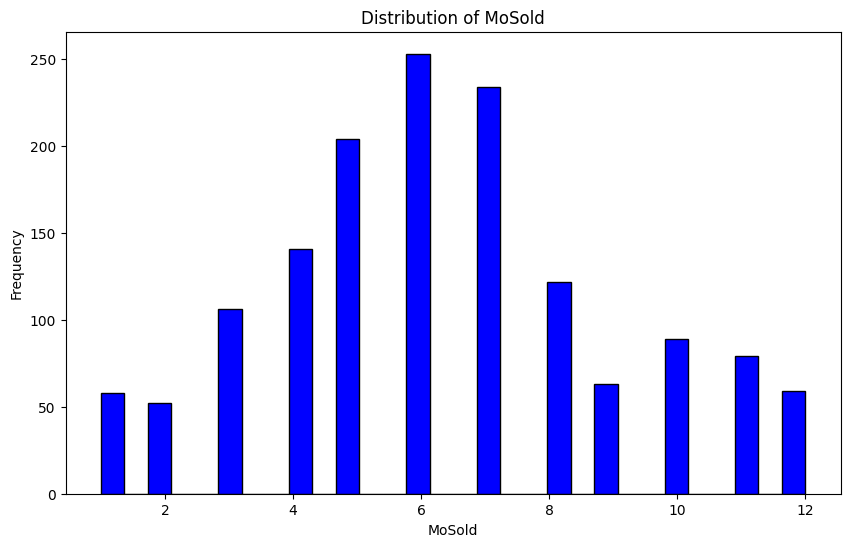

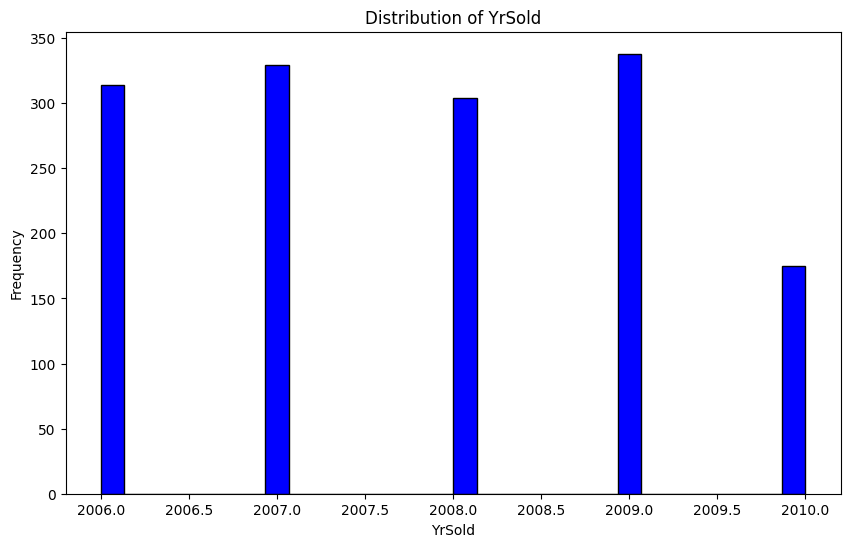

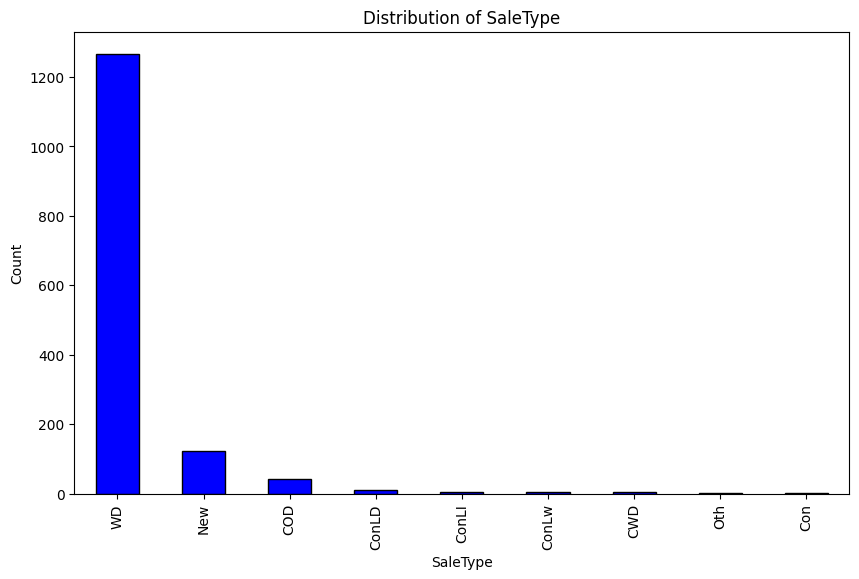

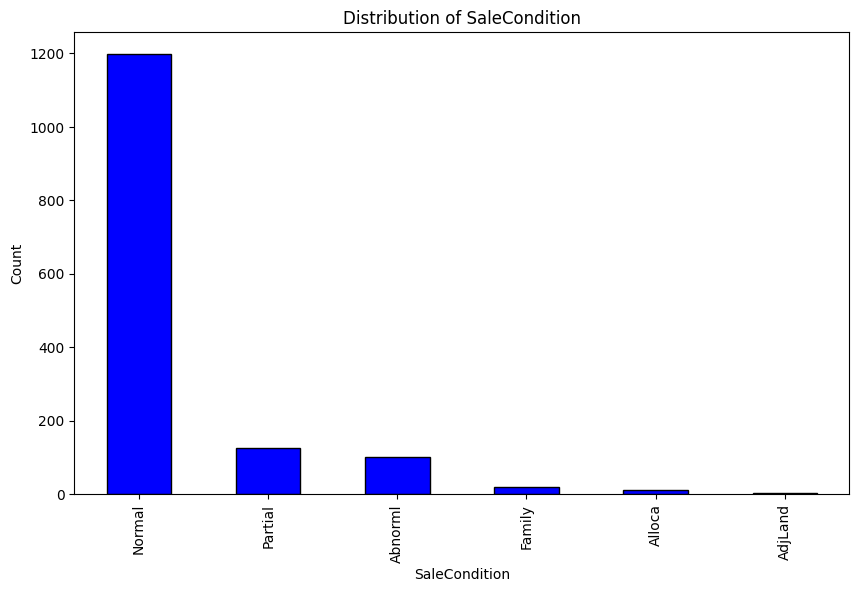

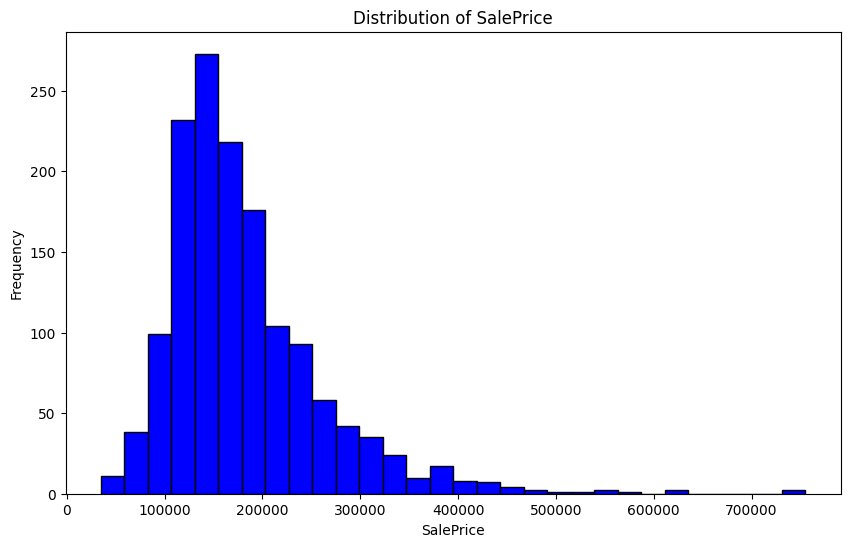

In [5]:
import matplotlib.pyplot as plt

# Plot distributions of all features in df_train
for column in df_train.columns:
    plt.figure(figsize=(10, 6))
    if df_train[column].dtype in ['int64', 'float64']:
        # Numerical feature
        plt.hist(df_train[column], bins=30, color='blue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Categorical feature
        df_train[column].value_counts().plot(kind='bar', color='blue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.show()

In [45]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Check if 'Id' column exists before dropping it
if 'Id' in df_train.columns:
	df_train.drop(columns=['Id'], inplace=True)

In [46]:
print("Missing values in df_train:")
print(df_train.isnull().sum())

print("\nMissing values in df_test:")
print(df_test.isnull().sum())

Missing values in df_train:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

Missing values in df_test:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [25]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Data treatment using tools

### Feature-engine (https://feature-engine.trainindata.com/en/latest/)

In [3]:
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

# Autogluon

In [ ]:
predictor_v3 = TabularPredictor(label='SalePrice').fit(df_train, time_limit=300, presets='experimental')

In [ ]:
predictor_test = TabularPredictor.load("/Users/tangliu/coding/Github/Predict_Income/AutogluonModels/ag-20250319_172148")



In [5]:
predictor_test.leaderboard(df_train)

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-153.598391,-45617.528018,root_mean_squared_error,0.049602,0.008853,0.002800,0.049602,0.008853,0.002800,1,True,2
1,LightGBMLarge_BAG_L1,-4048.237479,-26284.845040,root_mean_squared_error,1.234535,0.858522,25.994297,1.234535,0.858522,25.994297,1,True,11
2,XGBoost_r33_BAG_L1,-4428.156879,-26707.926004,root_mean_squared_error,0.447897,0.310449,14.685136,0.447897,0.310449,14.685136,1,True,19
3,XGBoost_BAG_L1,-4629.673612,-26964.719350,root_mean_squared_error,0.232961,0.104953,3.342347,0.232961,0.104953,3.342347,1,True,9
4,LightGBM_r188_BAG_L1,-4825.919009,-25187.109110,root_mean_squared_error,0.460568,0.291537,3.363257,0.460568,0.291537,3.363257,1,True,25
5,XGBoost_r89_BAG_L1,-5594.441628,-25439.263203,root_mean_squared_error,0.187594,0.076572,2.119141,0.187594,0.076572,2.119141,1,True,27
6,CatBoost_r13_BAG_L1,-5926.252835,-24921.827026,root_mean_squared_error,0.093091,0.114938,93.543598,0.093091,0.114938,93.543598,1,True,23
7,CatBoost_r177_BAG_L1,-6950.879578,-24680.679289,root_mean_squared_error,0.041066,0.093323,10.234492,0.041066,0.093323,10.234492,1,True,12
8,LightGBMXT_BAG_L1,-7408.249100,-25076.039212,root_mean_squared_error,0.848542,0.331898,3.896843,0.848542,0.331898,3.896843,1,True,3
9,CatBoost_r9_BAG_L1,-8490.805898,-24873.534321,root_mean_squared_error,0.124656,0.136323,154.403350,0.124656,0.136323,154.403350,1,True,16


In [6]:
print("AutoGluon infers problem type is: ", predictor_test.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor_test.feature_metadata)

AutoGluon infers problem type is:  regression
AutoGluon identified the following types of features:
('category', [])  : 34 | ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', ...]
('float', [])     :  3 | ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
('int', [])       : 33 | ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', ...]
('int', ['bool']) :  3 | ['Street', 'Utilities', 'CentralAir']


In [ ]:
predictor_test.feature_importance(df_train)

In [17]:
numerical_columns = df_test.select_dtypes(include=['number']).columns
df_test[numerical_columns] = df_test[numerical_columns].fillna(0)

In [18]:
df_test[numerical_columns]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,11622,5,6,1961,1961,896,0,0,896,...,0,140,0,0,0,120,0,0,6,2010
1,20,14267,6,6,1958,1958,1329,0,0,1329,...,0,393,36,0,0,0,0,12500,6,2010
2,60,13830,5,5,1997,1998,928,701,0,1629,...,1,212,34,0,0,0,0,0,3,2010
3,60,9978,6,6,1998,1998,926,678,0,1604,...,1,360,36,0,0,0,0,0,6,2010
4,120,5005,8,5,1992,1992,1280,0,0,1280,...,0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,546,546,0,1092,...,0,0,0,0,0,0,0,0,6,2006
1455,160,1894,4,5,1970,1970,546,546,0,1092,...,0,0,24,0,0,0,0,0,4,2006
1456,20,20000,5,7,1960,1996,1224,0,0,1224,...,1,474,0,0,0,0,0,0,9,2006
1457,85,10441,5,5,1992,1992,970,0,0,970,...,0,80,32,0,0,0,0,700,7,2006


In [ ]:
df_test


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,...,144,0,NA,NA,NA,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# df_test.drop(columns=['Id'], inplace=True)
prediction_v1  = predictor_v1.predict(df_test)
pred1_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_v1})
pred1_df.to_csv('predictions3.csv', index=False)

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module

In [28]:
# df_test.drop(columns=['Id'], inplace=True)
prediction_v2  = predictor_v2.predict(df_test)
pred2_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_v2})
pred2_df.to_csv('predictions2.csv', index=False)

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module

In [12]:
predictor_best = TabularPredictor(label='SalePrice').fit(df_train, time_limit=12000, presets='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20250321_163424"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       2.62 GB / 16.00 GB (16.4%)
Disk Space Avail:   106.20 GB / 926.35 GB (11.5%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a conseque

In [35]:
predictor_best = TabularPredictor.load("/Users/tangliu/coding/Github/Predict_Income/AutogluonModels/ag-20250321_163424")
predictor_best.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                           model      score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L2  -22578.621054  root_mean_squared_error       0.962792   94.513316                0.000194           0.010316            2       True        109
1            WeightedEnsemble_L3  -22833.139528  root_mean_squared_error       4.807687  224.893162                0.000158           0.007975            3       True        216
2             XGBoost_r31_BAG_L2  -23911.582671  root_mean_squared_error       3.905482  192.144590                0.387046           2.288659            2       True        182
3          ExtraTrees_r42_BAG_L2  -23921.423032  root_mean_squared_error       3.587951  190.244513                0.069515           0.388582            2       True        127
4            CatBoost_r69_BAG_L2  -23969.066888 

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

In [23]:
predictor_best._trainer.get_model_info("XGBoost_r31_BAG_L2")

# predictor_best.model_names()

{'name': 'XGBoost_r31_BAG_L2',
 'model_type': 'StackerEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 2.288658857345581,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.38704633712768555,
 'val_score': -23911.582670739932,
 'hyperparameters': {'use_orig_features': True,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': [],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': False},
 'num_features': 9

In [28]:
predictor_best

In [17]:
prediction_best_v2  = predictor_best.predict(df_test)
pred_best_v2_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_best_v2})
pred_best_v2_df.to_csv('predictions_best_v2.csv', index=False)

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module

## Test the results of AutoGluon

In [53]:
# load the saved predictor
# predictor_interest = TabularPredictor.load("/Users/tangliu/coding/Github/Predict_Income/AutogluonModels/ag-20250321_163424")
# load the calcuated predictor
predictor_interest = predictor_v3

# Show the summary of the predictor
summary = predictor_interest.fit_summary(show_plot=True)

# Show the best model from the predictor
predictor_interest._trainer.get_model_info(predictor_interest._trainer.get_model_best())



*** Summary of fit() ***
Estimated performance of each model:
                     model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -24296.505921  root_mean_squared_error       0.212872  134.237032                0.000174           0.006883            3       True         16
1      WeightedEnsemble_L2 -24296.505921  root_mean_squared_error       0.212902  134.236096                0.000204           0.005946            2       True          9
2        LightGBMXT_BAG_L1 -25076.039212  root_mean_squared_error       0.089002   50.344658                0.089002          50.344658            1       True          3
3          CatBoost_BAG_L1 -25326.648427  root_mean_squared_error       0.059671   80.417107                0.059671          80.417107            1       True          6
4          CatBoost_BAG_L2 -25880.538905  root_mean_squared_error       0.471642  1

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.006882905960083008,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00017404556274414062,
 'val_score': -24296.50592058588,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fa

These features in provided data are not utilized by the predictor and will be ignored: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Computing feature importance via permutation shuffling for 73 features using 1460 rows with 5 shuffle sets...
	258.76s	= Expected runtime (51.75s per shuffle set)
	132.1s	= Actual runtime (Completed 5 of 5 shuffle sets)


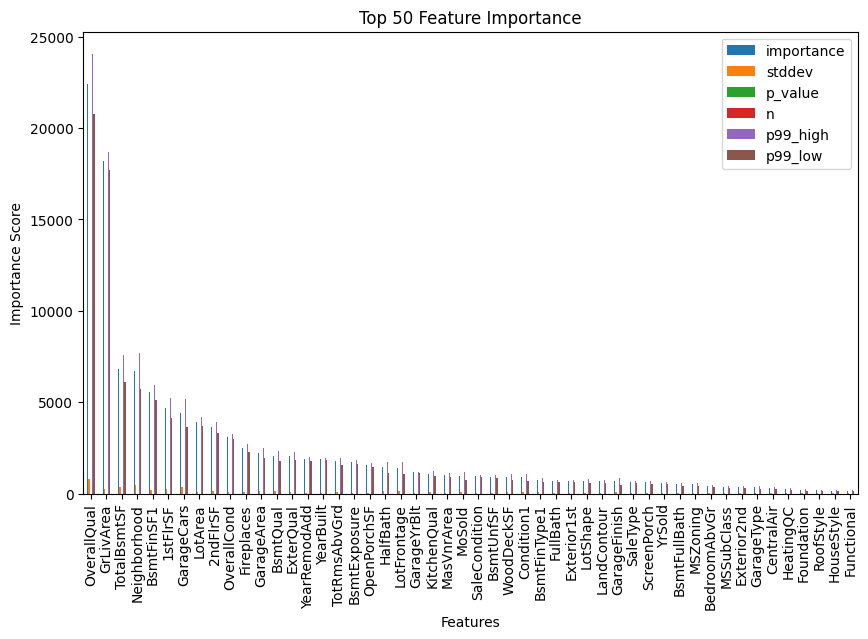

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = predictor_interest.feature_importance(df_train)


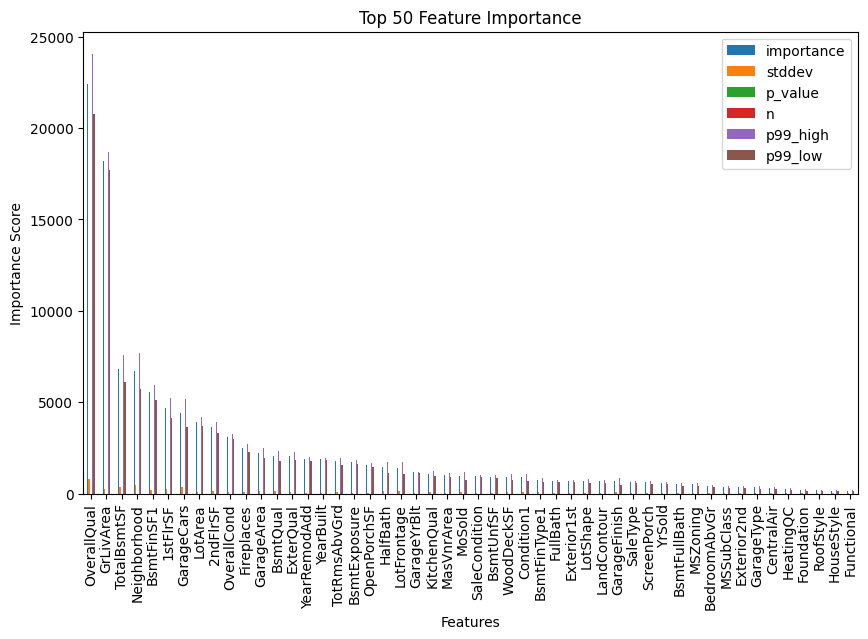

In [ ]:
# Plot the top n most important features
n = 50  # Change this to the desired number of features

top_features = feature_importance[:n]
top_features.plot(kind='bar', figsize=(10, 6))
plt.title(f'Top {n} Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

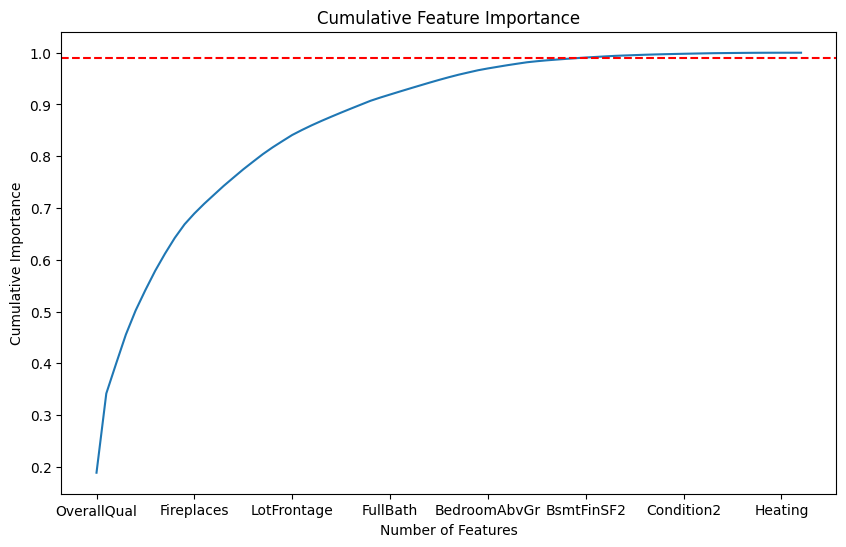

In [63]:
# Sort features by importance
sorted_features = feature_importance.sort_values(by='importance', ascending=False)

# Calculate cumulative importance
sorted_features['cumulative_importance'] = sorted_features['importance'].cumsum() / sorted_features['importance'].sum()

# Plot cumulative importance
sorted_features['cumulative_importance'].plot(kind='line', figsize=(10, 6))
plt.axhline(y=0.99, color='r', linestyle='--')  # 95% threshold
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

In [120]:
# Filter features that cumulative importance to 0.95
features_above_threshold = sorted_features[sorted_features['cumulative_importance'] < 0.80].index.tolist()

# Use the filtered features
df_train_filtered = df_train[features_above_threshold + ['SalePrice']]

In [121]:
len(features_above_threshold)

17

### Condensed data

In [ ]:
# Fit the model again with the filtered features

predictor_filtered_v1 = TabularPredictor(label='SalePrice').fit(df_train_filtered, time_limit=600, presets='best')

No path specified. Models will be saved in: "AutogluonModels/ag-20250330_233206"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       2.45 GB / 16.00 GB (15.3%)
Disk Space Avail:   75.98 GB / 926.35 GB (8.2%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequenc

[1000]	valid_set's rmse: 30642.9
[2000]	valid_set's rmse: 30048.6
[3000]	valid_set's rmse: 29947.1


	Ran out of time, early stopping on iteration 3161. Best iteration is:
	[3151]	valid_set's rmse: 29941.7
	Ran out of time, early stopping on iteration 577. Best iteration is:
	[471]	valid_set's rmse: 28720.6
	-25224.4488	 = Validation score   (-root_mean_squared_error)
	88.61s	 = Training   runtime
	2.91s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 5.09s of the 55.06s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's rmse: 63450.4
	Time limit exceeded... Skipping LightGBM_BAG_L1.
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 0.88s of the 50.85s of remaining time.
	-29569.5151	 = Validation score   (-root_mean_squared_error)
	5.95s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 149.84s of the 43.80s of remaining time.
	Ens

[1000]	valid_set's rmse: 26885.7


	Ran out of time, early stopping on iteration 1041. Best iteration is:
	[944]	valid_set's rmse: 26827.9


[1000]	valid_set's rmse: 28191.7


	Ran out of time, early stopping on iteration 1494. Best iteration is:
	[1494]	valid_set's rmse: 27725


[1000]	valid_set's rmse: 24606.7
[1000]	valid_set's rmse: 32070.8


	-25201.3455	 = Validation score   (-root_mean_squared_error)
	158.94s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 137.37s of the 286.62s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26963.2555	 = Validation score   (-root_mean_squared_error)
	12.94s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 124.31s of the 273.57s of remaining time.
	-28926.6356	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 123.53s of the 272.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3351.
	-25087.7784	 = Validation score   (-root_mean_squared_error)
	59.7s	 = Training   runtime
	0.04

[1000]	valid_set's rmse: 30997.9
[2000]	valid_set's rmse: 30519.9
[3000]	valid_set's rmse: 30419.7


	Ran out of time, early stopping on iteration 3969. Best iteration is:
	[3960]	valid_set's rmse: 30399.3


[1000]	valid_set's rmse: 19850.2


	-26253.7944	 = Validation score   (-root_mean_squared_error)
	39.19s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 109.56s of the 109.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 29754
[2000]	valid_set's rmse: 28997.1
[3000]	valid_set's rmse: 28891.9
[4000]	valid_set's rmse: 28868.6


	Ran out of time, early stopping on iteration 5014. Best iteration is:
	[5004]	valid_set's rmse: 28864.6


[5000]	valid_set's rmse: 28864.6


	-25706.5252	 = Validation score   (-root_mean_squared_error)
	31.73s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 77.54s of the 77.51s of remaining time.
	-24366.0766	 = Validation score   (-root_mean_squared_error)
	1.04s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 76.35s of the 76.32s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24733.0816	 = Validation score   (-root_mean_squared_error)
	19.19s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 57.09s of the 57.06s of remaining time.
	-24518.9898	 = Validation score   (-root_mean_squared_error)
	0.4s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 56.54s of the 56.51s of remaining time.
	Fitting 8 c

### Check the results

In [82]:
# check the best models in the predictor
predictor_filtered_interested = predictor_filtered_v1

# Show the summary of the predictor
summary_filtered = predictor_filtered_interested.fit_summary(show_plot=True)

# Show the best model from the predictor
predictor_filtered_interested._trainer.get_model_info(predictor_filtered_interested._trainer.get_model_best())


*** Summary of fit() ***
Estimated performance of each model:
                     model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -22972.572714  root_mean_squared_error       0.916173  319.649310                0.000222           0.008915            3       True         21
1      WeightedEnsemble_L2 -23277.079689  root_mean_squared_error       0.432076  266.804877                0.000228           0.007808            2       True         12
2   RandomForestMSE_BAG_L2 -24366.076606  root_mean_squared_error       0.797121  282.247806                0.079664           1.042634            2       True         15
3     ExtraTreesMSE_BAG_L2 -24518.989831  root_mean_squared_error       0.789135  281.603792                0.071679           0.398620            2       True         17
4           XGBoost_BAG_L2 -24689.789225  root_mean_squared_error       0.753878  2

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.008915185928344727,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00022220611572265625,
 'val_score': -22972.572713590285,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': F

In [ ]:
# make predictions
prediction_filtered_v1  = predictor_filtered_v1.predict(df_test[features_above_threshold])
# save the predictions to csv files
pred_filtered_v1_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_filtered_v1})
pred_filtered_v1_df.to_csv('predictions_filtered_v1.csv', index=False)

### Test results
The test result is 13675. This is not worse than the results obtained using the full training data. 
Consider making the training longer. 

In [85]:
# make the training longer
predictor_filtered_v2 = TabularPredictor(label='SalePrice').fit(df_train_filtered, time_limit=12000, presets='best')

# Show the summary of the predictor
summary_filtered_v2 = predictor_filtered_v2.fit_summary(show_plot=True)
# Show the best model from the predictor
predictor_filtered_v2._trainer.get_model_info(predictor_filtered_v2._trainer.get_model_best())

No path specified. Models will be saved in: "AutogluonModels/ag-20250330_235341"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       2.79 GB / 16.00 GB (17.4%)
Disk Space Avail:   75.73 GB / 926.35 GB (8.2%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequenc

[1000]	valid_set's rmse: 30642.9
[2000]	valid_set's rmse: 30048.6
[3000]	valid_set's rmse: 29947.1
[4000]	valid_set's rmse: 29924.7
[5000]	valid_set's rmse: 29916.3
[6000]	valid_set's rmse: 29913.5
[7000]	valid_set's rmse: 29911.5
[8000]	valid_set's rmse: 29910.1
[9000]	valid_set's rmse: 29909.2
[10000]	valid_set's rmse: 29908.5


	-25219.5309	 = Validation score   (-root_mean_squared_error)
	55.54s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1943.33s of the 2943.74s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26840.3892	 = Validation score   (-root_mean_squared_error)
	12.98s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 1930.28s of the 2930.70s of remaining time.
	-29569.5151	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 1929.58s of the 2929.99s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24741.4438	 = Validation score   (-root_mean_squared_error)
	43.57s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTr

[1000]	valid_set's rmse: 24079.8
[2000]	valid_set's rmse: 24078.7
[3000]	valid_set's rmse: 24078.7
[4000]	valid_set's rmse: 24078.7


	-29953.4992	 = Validation score   (-root_mean_squared_error)
	123.05s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 1713.08s of the 2713.49s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25131.1749	 = Validation score   (-root_mean_squared_error)
	10.41s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 1702.59s of the 2703.00s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-27130.2971	 = Validation score   (-root_mean_squared_error)
	38.05s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L1 ... Training model for up to 1664.40s of the 2664.81s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26368.6193	 = Validation score   (-roo

[1000]	valid_set's rmse: 25155.2
[2000]	valid_set's rmse: 23966.5
[3000]	valid_set's rmse: 23652.6
[4000]	valid_set's rmse: 23588
[1000]	valid_set's rmse: 27542.9
[2000]	valid_set's rmse: 27190.9
[1000]	valid_set's rmse: 22465.5
[1000]	valid_set's rmse: 21061.2
[1000]	valid_set's rmse: 37159.9
[2000]	valid_set's rmse: 35348.4
[3000]	valid_set's rmse: 34165.9
[4000]	valid_set's rmse: 33412.9
[5000]	valid_set's rmse: 32753.8
[6000]	valid_set's rmse: 32270
[7000]	valid_set's rmse: 31807
[8000]	valid_set's rmse: 31519.6
[9000]	valid_set's rmse: 31234.5
[10000]	valid_set's rmse: 30965
[1000]	valid_set's rmse: 31606.9
[2000]	valid_set's rmse: 30341.2


	-25726.311	 = Validation score   (-root_mean_squared_error)
	44.87s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 1361.71s of the 2362.12s of remaining time.


[3000]	valid_set's rmse: 30222.4


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25081.3968	 = Validation score   (-root_mean_squared_error)
	47.94s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 1313.52s of the 2313.93s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-27347.962	 = Validation score   (-root_mean_squared_error)
	70.31s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: ExtraTrees_r42_BAG_L1 ... Training model for up to 1242.81s of the 2243.22s of remaining time.
	-29575.7467	 = Validation score   (-root_mean_squared_error)
	0.34s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_r137_BAG_L1 ... Training model for up to 1242.34s of the 2242.75s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25617.6752	 = Validation score   (-root_mean_sq

[1000]	valid_set's rmse: 30796.6
[1000]	valid_set's rmse: 32172.2


	-26271.9255	 = Validation score   (-root_mean_squared_error)
	80.87s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI_r145_BAG_L1 ... Training model for up to 830.45s of the 1830.87s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mod

[1000]	valid_set's rmse: 32605.5
[2000]	valid_set's rmse: 31118.5
[3000]	valid_set's rmse: 30398.7
[4000]	valid_set's rmse: 30050.8
[5000]	valid_set's rmse: 29866.5
[6000]	valid_set's rmse: 29758.6
[7000]	valid_set's rmse: 29713.5
[8000]	valid_set's rmse: 29693.8
[9000]	valid_set's rmse: 29682
[10000]	valid_set's rmse: 29678.3


	-25872.131	 = Validation score   (-root_mean_squared_error)
	25.73s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch_r86_BAG_L1 ... Training model for up to 732.81s of the 1733.22s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-22309.1518	 = Validation score   (-root_mean_squared_error)
	38.46s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_r50_BAG_L1 ... Training model for up to 694.22s of the 1694.63s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26494.7194	 = Validation score   (-root_mean_squared_error)
	29.27s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_r11_BAG_L1 ... Training model for up to 664.86s of the 1665.27s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_

[1000]	valid_set's rmse: 17612.4
[2000]	valid_set's rmse: 17551.3
[1000]	valid_set's rmse: 25366.1
[1000]	valid_set's rmse: 20696.7
[1000]	valid_set's rmse: 33666.1


	-26062.6156	 = Validation score   (-root_mean_squared_error)
	78.7s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI_r143_BAG_L1 ... Training model for up to 515.21s of the 1515.62s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mode

[1000]	valid_set's rmse: 17696.5
[2000]	valid_set's rmse: 17422.3
[3000]	valid_set's rmse: 17355
[4000]	valid_set's rmse: 17373.3
[1000]	valid_set's rmse: 25910.6
[2000]	valid_set's rmse: 25069.4
[3000]	valid_set's rmse: 24885.7
[4000]	valid_set's rmse: 24829.7
[5000]	valid_set's rmse: 24823.9
[6000]	valid_set's rmse: 24849.9
[1000]	valid_set's rmse: 31670
[1000]	valid_set's rmse: 26394.2
[2000]	valid_set's rmse: 25820.8
[3000]	valid_set's rmse: 25807.5
[1000]	valid_set's rmse: 22768.6
[2000]	valid_set's rmse: 22015.1
[3000]	valid_set's rmse: 21985.3
[1000]	valid_set's rmse: 21140.3
[2000]	valid_set's rmse: 20685.1
[1000]	valid_set's rmse: 36871.1
[2000]	valid_set's rmse: 34130.9
[3000]	valid_set's rmse: 33252
[4000]	valid_set's rmse: 32842.7
[5000]	valid_set's rmse: 32729.2
[6000]	valid_set's rmse: 32678.7
[7000]	valid_set's rmse: 32651.9
[8000]	valid_set's rmse: 32641.4
[9000]	valid_set's rmse: 32636.5
[10000]	valid_set's rmse: 32634
[1000]	valid_set's rmse: 31160
[2000]	valid_set's 

	-26118.8824	 = Validation score   (-root_mean_squared_error)
	299.25s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 174.61s of the 1175.02s of remaining time.
	-29100.247	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 174.08s of the 1174.49s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26662.097	 = Validation score   (-root_mean_squared_error)
	38.62s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI_r95_BAG_L1 ... Training model for up to 135.38s of the 1135.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed T

[1000]	valid_set's rmse: 36078.7


	-24961.5973	 = Validation score   (-root_mean_squared_error)
	15.55s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 984.69s of the 984.53s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23159.4375	 = Validation score   (-root_mean_squared_error)
	17.3s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 967.28s of the 967.12s of remaining time.
	-22411.8921	 = Validation score   (-root_mean_squared_error)
	1.09s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 965.95s of the 965.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24176.1562	 = Validation score   (-root_mean_squared_error)
	15.9s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_B

[1000]	valid_set's rmse: 29941.5
[1000]	valid_set's rmse: 23959.5
[2000]	valid_set's rmse: 23474.8
[3000]	valid_set's rmse: 23275
[4000]	valid_set's rmse: 23209.9
[5000]	valid_set's rmse: 23201.5
[6000]	valid_set's rmse: 23207.1


	-22843.546	 = Validation score   (-root_mean_squared_error)
	70.38s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L2 ... Training model for up to 727.31s of the 727.15s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **model

[1000]	valid_set's rmse: 18729
[1000]	valid_set's rmse: 39116.4
[2000]	valid_set's rmse: 38299.3
[3000]	valid_set's rmse: 37772.3
[4000]	valid_set's rmse: 37467.7
[5000]	valid_set's rmse: 37218.9
[6000]	valid_set's rmse: 37068.3
[7000]	valid_set's rmse: 36849.1
[8000]	valid_set's rmse: 36738.7
[9000]	valid_set's rmse: 36632.5
[10000]	valid_set's rmse: 36573.2
[1000]	valid_set's rmse: 29753.2
[2000]	valid_set's rmse: 29251.7
[3000]	valid_set's rmse: 29092.1
[4000]	valid_set's rmse: 28993
[5000]	valid_set's rmse: 28936.3
[6000]	valid_set's rmse: 28893.2
[7000]	valid_set's rmse: 28852.6
[8000]	valid_set's rmse: 28862.1
[9000]	valid_set's rmse: 28818
[10000]	valid_set's rmse: 28810.9


	-26156.5438	 = Validation score   (-root_mean_squared_error)
	41.2s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 623.30s of the 623.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24375.8025	 = Validation score   (-root_mean_squared_error)
	62.61s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L2 ... Training model for up to 560.51s of the 560.35s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23248.7852	 = Validation score   (-root_mean_squared_error)
	38.92s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTrees_r42_BAG_L2 ... Training model for up to 521.37s of the 521.21s of remaining time.
	-23321.6274	 = Validation score   (-root_mean_squared_error)
	0.35s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: Cat

[1000]	valid_set's rmse: 20679


	-25770.2535	 = Validation score   (-root_mean_squared_error)
	46.75s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_r145_BAG_L2 ... Training model for up to 418.02s of the 417.86s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mode

[1000]	valid_set's rmse: 34439.5
[2000]	valid_set's rmse: 33733.9
[3000]	valid_set's rmse: 33422.5
[4000]	valid_set's rmse: 33247.3
[5000]	valid_set's rmse: 33253.4


	-24495.4688	 = Validation score   (-root_mean_squared_error)
	17.98s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch_r86_BAG_L2 ... Training model for up to 320.39s of the 320.23s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24402.222	 = Validation score   (-root_mean_squared_error)
	38.76s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_r50_BAG_L2 ... Training model for up to 281.47s of the 281.31s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23768.2253	 = Validation score   (-root_mean_squared_error)
	6.55s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI_r11_BAG_L2 ... Training model for up to 274.84s of the 274.68s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_norm

[1000]	valid_set's rmse: 29894


	-23377.1961	 = Validation score   (-root_mean_squared_error)
	43.38s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_r143_BAG_L2 ... Training model for up to 185.13s of the 184.97s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mode

[1000]	valid_set's rmse: 17998.4
[1000]	valid_set's rmse: 20609.2
[1000]	valid_set's rmse: 38259.2
[2000]	valid_set's rmse: 37796.4


	Ran out of time, early stopping on iteration 2992. Best iteration is:
	[2702]	valid_set's rmse: 37699.7


[1000]	valid_set's rmse: 27955.6
[2000]	valid_set's rmse: 27668.4
[3000]	valid_set's rmse: 27676.5
[1000]	valid_set's rmse: 23092.3


	-26246.0621	 = Validation score   (-root_mean_squared_error)
	99.55s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForest_r39_BAG_L2 ... Training model for up to 64.97s of the 64.81s of remaining time.
	-22385.8353	 = Validation score   (-root_mean_squared_error)
	0.66s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_r167_BAG_L2 ... Training model for up to 64.18s of the 64.02s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24496.9126	 = Validation score   (-root_mean_squared_error)
	21.66s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI_r95_BAG_L2 ... Training model for up to 42.44s of the 42.28s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback

[1000]	valid_set's rmse: 26885.7
[2000]	valid_set's rmse: 26702.6
[3000]	valid_set's rmse: 26685.1
[1000]	valid_set's rmse: 28191.7
[2000]	valid_set's rmse: 27574.5
[3000]	valid_set's rmse: 27477.1
[1000]	valid_set's rmse: 24606.7
[1000]	valid_set's rmse: 32070.8


	-25147.6933	 = Validation score   (-root_mean_squared_error)
	42.05s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 8959.59s of the 8959.58s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26963.2555	 = Validation score   (-root_mean_squared_error)
	10.95s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 8948.56s of the 8948.56s of remaining time.
	-28926.6356	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 8947.91s of the 8947.91s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25086.9599	 = Validation score   (-root_mean_squared_error)
	69.98s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTr

[1000]	valid_set's rmse: 26885.6
[2000]	valid_set's rmse: 26884


	-26507.2978	 = Validation score   (-root_mean_squared_error)
	90.41s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 8727.86s of the 8727.86s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25074.9277	 = Validation score   (-root_mean_squared_error)
	12.3s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 8715.48s of the 8715.47s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25513.07	 = Validation score   (-root_mean_squared_error)
	101.95s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L1 ... Training model for up to 8613.29s of the 8613.28s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 24793.1
[1000]	valid_set's rmse: 28617
[2000]	valid_set's rmse: 27103.2
[3000]	valid_set's rmse: 26222.8
[4000]	valid_set's rmse: 25786.4
[5000]	valid_set's rmse: 25553.3
[6000]	valid_set's rmse: 25457.3
[7000]	valid_set's rmse: 25433.7
[8000]	valid_set's rmse: 25422.9
[9000]	valid_set's rmse: 25415.5
[10000]	valid_set's rmse: 25403.3


	-25226.0717	 = Validation score   (-root_mean_squared_error)
	80.59s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 8531.96s of the 8531.95s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mo

[1000]	valid_set's rmse: 20070.8
[2000]	valid_set's rmse: 18764.3
[3000]	valid_set's rmse: 18349
[4000]	valid_set's rmse: 18266.6
[5000]	valid_set's rmse: 18182.1
[6000]	valid_set's rmse: 18115
[7000]	valid_set's rmse: 18110.6
[8000]	valid_set's rmse: 18103.4
[9000]	valid_set's rmse: 18074.1
[10000]	valid_set's rmse: 18090.6
[1000]	valid_set's rmse: 29648.2
[2000]	valid_set's rmse: 28340.2
[3000]	valid_set's rmse: 28056.8
[4000]	valid_set's rmse: 27899.9
[5000]	valid_set's rmse: 27883.1
[6000]	valid_set's rmse: 27868.9
[7000]	valid_set's rmse: 27847.9
[8000]	valid_set's rmse: 27875.4
[1000]	valid_set's rmse: 25175.1
[1000]	valid_set's rmse: 26799.5
[2000]	valid_set's rmse: 25278.9
[3000]	valid_set's rmse: 24758.7
[4000]	valid_set's rmse: 24456.2
[5000]	valid_set's rmse: 24261
[6000]	valid_set's rmse: 24114.8
[7000]	valid_set's rmse: 24042.1
[8000]	valid_set's rmse: 23958.2
[9000]	valid_set's rmse: 23893.1
[10000]	valid_set's rmse: 23885.1
[1000]	valid_set's rmse: 35682.5
[2000]	valid_s

	-25523.7465	 = Validation score   (-root_mean_squared_error)
	67.56s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 8372.30s of the 8372.29s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25888.7961	 = Validation score   (-root_mean_squared_error)
	69.79s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 8302.37s of the 8302.37s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26093.5633	 = Validation score   (-root_mean_squared_error)
	36.91s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTrees_r42_BAG_L1 ... Training model for up to 8265.23s of the 8265.22s of remaining time.
	-29134.6279	 = Validation score   (-root_mean_squared_error)
	0.39s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting mo

[1000]	valid_set's rmse: 27549.5
[1000]	valid_set's rmse: 32078
[2000]	valid_set's rmse: 32070.7


	-25393.9898	 = Validation score   (-root_mean_squared_error)
	76.57s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI_r145_BAG_L1 ... Training model for up to 8010.26s of the 8010.26s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mo

[1000]	valid_set's rmse: 20752.1
[1000]	valid_set's rmse: 27176.8
[1000]	valid_set's rmse: 33487.8
[2000]	valid_set's rmse: 31867.1
[3000]	valid_set's rmse: 31048.7
[4000]	valid_set's rmse: 30480.9
[5000]	valid_set's rmse: 30203.8
[6000]	valid_set's rmse: 30042.1
[7000]	valid_set's rmse: 29948.8
[8000]	valid_set's rmse: 29887.2
[9000]	valid_set's rmse: 29845.8
[10000]	valid_set's rmse: 29819.6


	-25628.5817	 = Validation score   (-root_mean_squared_error)
	30.84s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetTorch_r86_BAG_L1 ... Training model for up to 7835.79s of the 7835.79s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24794.0285	 = Validation score   (-root_mean_squared_error)
	28.54s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost_r50_BAG_L1 ... Training model for up to 7807.10s of the 7807.10s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24730.0841	 = Validation score   (-root_mean_squared_error)
	13.69s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI_r11_BAG_L1 ... Training model for up to 7793.32s of the 7793.31s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'char

[1000]	valid_set's rmse: 18406
[1000]	valid_set's rmse: 23713.9
[1000]	valid_set's rmse: 27461.5
[2000]	valid_set's rmse: 25712.7
[3000]	valid_set's rmse: 24865.1
[4000]	valid_set's rmse: 24415.8
[5000]	valid_set's rmse: 24162.6
[6000]	valid_set's rmse: 24017.4
[7000]	valid_set's rmse: 23931.7
[8000]	valid_set's rmse: 23879.1
[9000]	valid_set's rmse: 23847.3
[10000]	valid_set's rmse: 23825.2


	-25067.978	 = Validation score   (-root_mean_squared_error)
	146.71s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: NeuralNetFastAI_r143_BAG_L1 ... Training model for up to 7553.93s of the 7553.92s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **mo

[1000]	valid_set's rmse: 19641.6
[2000]	valid_set's rmse: 17802.8
[3000]	valid_set's rmse: 17417.6
[4000]	valid_set's rmse: 17352.7
[5000]	valid_set's rmse: 17359.6
[1000]	valid_set's rmse: 29403.1
[2000]	valid_set's rmse: 27893.5
[3000]	valid_set's rmse: 27472.9
[4000]	valid_set's rmse: 27397.7
[5000]	valid_set's rmse: 27382.1
[1000]	valid_set's rmse: 30760.2
[2000]	valid_set's rmse: 29199.4
[3000]	valid_set's rmse: 28467.3
[4000]	valid_set's rmse: 28108.8
[5000]	valid_set's rmse: 27940.8
[6000]	valid_set's rmse: 27874.5
[7000]	valid_set's rmse: 27856.8
[8000]	valid_set's rmse: 27860.8
[1000]	valid_set's rmse: 25232.4
[2000]	valid_set's rmse: 24484.1
[1000]	valid_set's rmse: 25975.6
[2000]	valid_set's rmse: 25020.4
[3000]	valid_set's rmse: 24878.9
[4000]	valid_set's rmse: 24812.8
[5000]	valid_set's rmse: 24765.4
[6000]	valid_set's rmse: 24751.8
[7000]	valid_set's rmse: 24755.3
[8000]	valid_set's rmse: 24761.5
[1000]	valid_set's rmse: 34827.2
[2000]	valid_set's rmse: 33546.7
[3000]	val

	-25371.5601	 = Validation score   (-root_mean_squared_error)
	391.2s	 = Training   runtime
	0.32s	 = Validation runtime
Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 7112.53s of the 7112.52s of remaining time.
	-28691.5235	 = Validation score   (-root_mean_squared_error)
	0.45s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 7111.97s of the 7111.96s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25528.5807	 = Validation score   (-root_mean_squared_error)
	41.44s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI_r95_BAG_L1 ... Training model for up to 7070.43s of the 7070.42s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detail

[1000]	valid_set's rmse: 25803.8
[2000]	valid_set's rmse: 25722.7
[1000]	valid_set's rmse: 26683.1
[1000]	valid_set's rmse: 35192.2
[1000]	valid_set's rmse: 26135
[1000]	valid_set's rmse: 19034.6


	-25306.9834	 = Validation score   (-root_mean_squared_error)
	24.89s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch_r158_BAG_L1 ... Training model for up to 6820.58s of the 6820.58s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24006.5943	 = Validation score   (-root_mean_squared_error)
	85.39s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost_r86_BAG_L1 ... Training model for up to 6735.04s of the 6735.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25285.0029	 = Validation score   (-root_mean_squared_error)
	99.84s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_r37_BAG_L1 ... Training model for up to 6635.06s of the 6635.06s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'cha

[1000]	valid_set's rmse: 20138.5


	-27021.2179	 = Validation score   (-root_mean_squared_error)
	24.41s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForest_r127_BAG_L1 ... Training model for up to 6563.57s of the 6563.56s of remaining time.
	-30744.4518	 = Validation score   (-root_mean_squared_error)
	0.43s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI_r134_BAG_L1 ... Training model for up to 6563.05s of the 6563.05s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/m

[1000]	valid_set's rmse: 17864.5
[2000]	valid_set's rmse: 17669.8
[1000]	valid_set's rmse: 27656.4
[2000]	valid_set's rmse: 27125.6
[3000]	valid_set's rmse: 27024.1
[1000]	valid_set's rmse: 24247.9
[2000]	valid_set's rmse: 23979.7
[1000]	valid_set's rmse: 34062.6
[2000]	valid_set's rmse: 32675.7
[3000]	valid_set's rmse: 32314.3
[4000]	valid_set's rmse: 32014.5
[5000]	valid_set's rmse: 31931.9
[6000]	valid_set's rmse: 31921.7


	-25442.0713	 = Validation score   (-root_mean_squared_error)
	35.85s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch_r143_BAG_L1 ... Training model for up to 6526.37s of the 6526.36s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25772.6158	 = Validation score   (-root_mean_squared_error)
	140.75s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_r128_BAG_L1 ... Training model for up to 6385.44s of the 6385.44s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25829.141	 = Validation score   (-root_mean_squared_error)
	82.27s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI_r111_BAG_L1 ... Training model for up to 6303.01s of the 6303.01s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'c

[1000]	valid_set's rmse: 18199.7
[2000]	valid_set's rmse: 17355.3
[3000]	valid_set's rmse: 17171.2
[4000]	valid_set's rmse: 17160.5
[5000]	valid_set's rmse: 17156.6
[1000]	valid_set's rmse: 28610.2
[2000]	valid_set's rmse: 27499.2
[3000]	valid_set's rmse: 27117.9
[4000]	valid_set's rmse: 27024.8
[5000]	valid_set's rmse: 26968
[6000]	valid_set's rmse: 26970.8
[1000]	valid_set's rmse: 24788.8
[1000]	valid_set's rmse: 25210.6
[2000]	valid_set's rmse: 24848.7
[3000]	valid_set's rmse: 24663.6
[4000]	valid_set's rmse: 24469.6
[5000]	valid_set's rmse: 24376.9
[6000]	valid_set's rmse: 24312.8
[7000]	valid_set's rmse: 24296.1
[8000]	valid_set's rmse: 24287.1
[9000]	valid_set's rmse: 24283.1
[10000]	valid_set's rmse: 24265.1
[1000]	valid_set's rmse: 34257
[2000]	valid_set's rmse: 33053.6
[3000]	valid_set's rmse: 32279.3
[4000]	valid_set's rmse: 31807.1
[5000]	valid_set's rmse: 31557.7
[6000]	valid_set's rmse: 31418.6
[7000]	valid_set's rmse: 31295.2
[8000]	valid_set's rmse: 31251.2
[9000]	valid_

	-25090.4057	 = Validation score   (-root_mean_squared_error)
	135.88s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: XGBoost_r49_BAG_L1 ... Training model for up to 6144.82s of the 6144.82s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25361.0099	 = Validation score   (-root_mean_squared_error)
	19.54s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost_r5_BAG_L1 ... Training model for up to 6125.14s of the 6125.13s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24458.6089	 = Validation score   (-root_mean_squared_error)
	15.3s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch_r87_BAG_L1 ... Training model for up to 6109.77s of the 6109.76s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25999.1545	 = Validation score   (-root_mea

[1000]	valid_set's rmse: 18952.6
[1000]	valid_set's rmse: 27656.2
[1000]	valid_set's rmse: 26208.7


	-26783.5745	 = Validation score   (-root_mean_squared_error)
	19.27s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost_r22_BAG_L1 ... Training model for up to 5872.62s of the 5872.61s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26452.7838	 = Validation score   (-root_mean_squared_error)
	9.09s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI_r69_BAG_L1 ... Training model for up to 5863.43s of the 5863.43s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train

[1000]	valid_set's rmse: 18159.2
[1000]	valid_set's rmse: 24435.6
[1000]	valid_set's rmse: 27747.2
[2000]	valid_set's rmse: 26105.2
[3000]	valid_set's rmse: 25352.9
[4000]	valid_set's rmse: 24963
[5000]	valid_set's rmse: 24748.1
[6000]	valid_set's rmse: 24613.9
[7000]	valid_set's rmse: 24536.4
[8000]	valid_set's rmse: 24487.9
[9000]	valid_set's rmse: 24458.5
[10000]	valid_set's rmse: 24439.1
[1000]	valid_set's rmse: 26568.6
[2000]	valid_set's rmse: 26440.5
[3000]	valid_set's rmse: 26375.5
[4000]	valid_set's rmse: 26364.2
[5000]	valid_set's rmse: 26365.3
[1000]	valid_set's rmse: 19436.4


	-25279.5562	 = Validation score   (-root_mean_squared_error)
	206.03s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: NeuralNetFastAI_r172_BAG_L1 ... Training model for up to 5639.05s of the 5639.05s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **m

[1000]	valid_set's rmse: 28827.9
[1000]	valid_set's rmse: 24299.2
[1000]	valid_set's rmse: 31307.7


	-25602.5023	 = Validation score   (-root_mean_squared_error)
	30.84s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch_r1_BAG_L1 ... Training model for up to 5138.82s of the 5138.82s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24645.3531	 = Validation score   (-root_mean_squared_error)
	90.59s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetTorch_r89_BAG_L1 ... Training model for up to 5048.06s of the 5048.05s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25196.6854	 = Validation score   (-root_mean_squared_error)
	56.78s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 900.20s of the 4991.10s of remaining time.
	Ensemble Weights: {'NeuralNetTorch_r158_BAG_L1': 0.333, 'NeuralNetTorch_r121_BAG_L1': 0.333, 'XGBoost_r89_BAG_L1': 0.143, 'Ligh

*** Summary of fit() ***
Estimated performance of each model:
                         model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L2 -21782.200902  root_mean_squared_error       0.421610  336.930161                0.000212           0.009784            2       True         86
1   NeuralNetTorch_r158_BAG_L1 -24006.594281  root_mean_squared_error       0.079505   85.389795                0.079505          85.389795            1       True         40
2          CatBoost_r70_BAG_L1 -24287.474285  root_mean_squared_error       0.042539   46.817920                0.042539          46.817920            1       True         33
3           CatBoost_r5_BAG_L1 -24458.608897  root_mean_squared_error       0.027745   15.298937                0.027745          15.298937            1       True         55
4           CatBoost_r6_BAG_L1 -24488.806869  root_mean_squared

{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.00978398323059082,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00021195411682128906,
 'val_score': -21782.20090155395,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fal

In [90]:
# Show the summary of the predictor
summary_filtered_v2 = predictor_filtered_v2.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                         model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L2 -21782.200902  root_mean_squared_error       0.421610  336.930161                0.000212           0.009784            2       True         86
1   NeuralNetTorch_r158_BAG_L1 -24006.594281  root_mean_squared_error       0.079505   85.389795                0.079505          85.389795            1       True         40
2          CatBoost_r70_BAG_L1 -24287.474285  root_mean_squared_error       0.042539   46.817920                0.042539          46.817920            1       True         33
3           CatBoost_r5_BAG_L1 -24458.608897  root_mean_squared_error       0.027745   15.298937                0.027745          15.298937            1       True         55
4           CatBoost_r6_BAG_L1 -24488.806869  root_mean_squared

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [92]:
# Show the model info from the predictor
predictor_filtered_v2._trainer.get_model_info("CatBoost_r70_BAG_L1")

{'name': 'CatBoost_r70_BAG_L1',
 'model_type': 'StackerEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 46.817920207977295,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.042539358139038086,
 'val_score': -24287.474284978107,
 'hyperparameters': {'use_orig_features': True,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': [],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': False},
 'num_features'

In [91]:
# Show the best model from the predictor
predictor_filtered_v2._trainer.get_model_info(predictor_filtered_v2._trainer.get_model_best())

{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.00978398323059082,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00021195411682128906,
 'val_score': -21782.20090155395,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fal

In [ ]:
# make predictions
prediction_filtered_v2  = predictor_filtered_v2.predict(df_test[features_above_threshold])
# save the predictions to csv files
pred_filtered_v2_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_filtered_v2})
pred_filtered_v2_df.to_csv('predictions_filtered_v2.csv', index=False)

The test result is 14366. It apparently overfits in this case.

In [97]:
# make predictions using specific model
# prediction_filtered_v2  = predictor_filtered_v2.predict(df_test[features_above_threshold], "CatBoost_r70_BAG_L1")
prediction_filtered_v2  = predictor_filtered_v2.predict(df_test[features_above_threshold], "NeuralNetTorch_r158_BAG_L1")
# save the predictions to csv files
pred_filtered_v2_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_filtered_v2})
pred_filtered_v2_df.to_csv('predictions_filtered_v2.csv', index=False)

The observation is that NN tends to overfit for long training. Tree based algorithms are most resistant to overfitting. 

In [98]:
# make the training not to long
predictor_filtered_v3 = TabularPredictor(label='SalePrice').fit(df_train_filtered, time_limit=1000, presets='best')


No path specified. Models will be saved in: "AutogluonModels/ag-20250331_022709"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       3.53 GB / 16.00 GB (22.1%)
Disk Space Avail:   74.40 GB / 926.35 GB (8.0%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequenc

[1000]	valid_set's rmse: 30642.9
[2000]	valid_set's rmse: 30048.6
[3000]	valid_set's rmse: 29947.1
[4000]	valid_set's rmse: 29924.7
[5000]	valid_set's rmse: 29916.3
[6000]	valid_set's rmse: 29913.5
[7000]	valid_set's rmse: 29911.5
[8000]	valid_set's rmse: 29910.1
[9000]	valid_set's rmse: 29909.2
[10000]	valid_set's rmse: 29908.5


	-25219.5309	 = Validation score   (-root_mean_squared_error)
	39.59s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 126.46s of the 209.78s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26840.3892	 = Validation score   (-root_mean_squared_error)
	9.98s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 116.41s of the 199.72s of remaining time.
	-29569.5151	 = Validation score   (-root_mean_squared_error)
	0.5s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 115.76s of the 199.07s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24741.4438	 = Validation score   (-root_mean_squared_error)
	42.25s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_B

[1000]	valid_set's rmse: 20518.3


	-25968.5787	 = Validation score   (-root_mean_squared_error)
	13.0s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 70.02s of the 69.99s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25500.9764	 = Validation score   (-root_mean_squared_error)
	10.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 59.95s of the 59.91s of remaining time.
	-24489.8121	 = Validation score   (-root_mean_squared_error)
	0.74s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 59.05s of the 59.02s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24997.0926	 = Validation score   (-root_mean_squared_error)
	15.48s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2

[1000]	valid_set's rmse: 26885.7
[2000]	valid_set's rmse: 26702.6
[3000]	valid_set's rmse: 26685.1
[1000]	valid_set's rmse: 28191.7
[2000]	valid_set's rmse: 27574.5
[3000]	valid_set's rmse: 27477.1
[1000]	valid_set's rmse: 24606.7
[1000]	valid_set's rmse: 32070.8


	-25147.6933	 = Validation score   (-root_mean_squared_error)
	38.97s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 459.81s of the 709.57s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26963.2555	 = Validation score   (-root_mean_squared_error)
	10.81s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 448.92s of the 698.68s of remaining time.
	-28926.6356	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 448.19s of the 697.95s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25086.9599	 = Validation score   (-root_mean_squared_error)
	71.5s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_

[1000]	valid_set's rmse: 26885.6
[2000]	valid_set's rmse: 26884


	-26507.2978	 = Validation score   (-root_mean_squared_error)
	68.57s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 252.73s of the 502.50s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25074.9277	 = Validation score   (-root_mean_squared_error)
	13.02s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 239.63s of the 489.40s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 372)
	-25535.4158	 = Validation score   (-root_mean_squared_error)
	72.85s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L1 ... Training model for up to 166.66s of the 416.43s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocal

[1000]	valid_set's rmse: 24793.1
[1000]	valid_set's rmse: 28617
[2000]	valid_set's rmse: 27103.2
[3000]	valid_set's rmse: 26222.8
[4000]	valid_set's rmse: 25786.4
[5000]	valid_set's rmse: 25553.3


	Ran out of time, early stopping on iteration 5088. Best iteration is:
	[5088]	valid_set's rmse: 25542.7
	-25243.7137	 = Validation score   (-root_mean_squared_error)
	48.45s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 117.69s of the 367.45s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(

[1000]	valid_set's rmse: 20070.8


	Ran out of time, early stopping on iteration 2099. Best iteration is:
	[2064]	valid_set's rmse: 18668


[2000]	valid_set's rmse: 18764.3
[1000]	valid_set's rmse: 29648.2


	Ran out of time, early stopping on iteration 2083. Best iteration is:
	[2075]	valid_set's rmse: 28290.7


[2000]	valid_set's rmse: 28340.2
[1000]	valid_set's rmse: 25175.1
[1000]	valid_set's rmse: 26799.5
[2000]	valid_set's rmse: 25278.9
[3000]	valid_set's rmse: 24758.7


	Ran out of time, early stopping on iteration 3234. Best iteration is:
	[3189]	valid_set's rmse: 24641.5


[1000]	valid_set's rmse: 35682.5
[2000]	valid_set's rmse: 34677.9
[3000]	valid_set's rmse: 33931.6


	Ran out of time, early stopping on iteration 3288. Best iteration is:
	[3278]	valid_set's rmse: 33765


[1000]	valid_set's rmse: 25450
[2000]	valid_set's rmse: 24984.5
[3000]	valid_set's rmse: 24815.6


	Ran out of time, early stopping on iteration 3806. Best iteration is:
	[3683]	valid_set's rmse: 24779.5


[1000]	valid_set's rmse: 21216.5


	-25972.0565	 = Validation score   (-root_mean_squared_error)
	22.87s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 4.27s of the 254.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 5)
	Ran out of time, stopping training early. (Stopping on epoch 5)
	Ran out of time, stopping training early. (Stopping on epoch 5)
	Ran out of time, stopping training early. (Stopping on epoch 6)
	Ran out of time, stopping training early. (Stopping on epoch 6)
	Ran out of time, stopping training early. (Stopping on epoch 6)
	Ran out of time, stopping training early. (Stopping on epoch 7)
	Ran out of time, stopping training early. (Stopping on epoch 9)
	-30066.3289	 = Validation score   (-root_mean_squared_error)
	3.99s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L1 ... Tra

[1000]	valid_set's rmse: 30259
[2000]	valid_set's rmse: 29780.3
[3000]	valid_set's rmse: 29678.4
[4000]	valid_set's rmse: 29656.5
[5000]	valid_set's rmse: 29650.6
[6000]	valid_set's rmse: 29650
[7000]	valid_set's rmse: 29649.8
[8000]	valid_set's rmse: 29649.8
[1000]	valid_set's rmse: 18885.5


	-25375.3782	 = Validation score   (-root_mean_squared_error)
	32.64s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 216.74s of the 216.70s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 27093.6
[2000]	valid_set's rmse: 26744.2
[3000]	valid_set's rmse: 26677.6
[4000]	valid_set's rmse: 26667.8
[5000]	valid_set's rmse: 26667.2


	-25171.6873	 = Validation score   (-root_mean_squared_error)
	25.56s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 190.96s of the 190.92s of remaining time.
	-24064.5239	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 189.91s of the 189.87s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23897.1803	 = Validation score   (-root_mean_squared_error)
	16.33s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 173.50s of the 173.46s of remaining time.
	-23823.3383	 = Validation score   (-root_mean_squared_error)
	0.34s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 173.02s of the 172.98s of remaining time.
	Fi

[1000]	valid_set's rmse: 26391.7
[1000]	valid_set's rmse: 19382.5


	-26392.2242	 = Validation score   (-root_mean_squared_error)
	70.25s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 66.06s of the 66.02s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24492.9652	 = Validation score   (-root_mean_squared_error)
	8.18s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L2 ... Training model for up to 57.80s of the 57.76s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-27206.737	 = Validation score   (-root_mean_squared_error)
	38.1s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L2 ... Training model for up to 19.56s of the 19.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 434. Best 

In [103]:
# Show the summary of the predictor





summary_filtered_v3 = predictor_filtered_v3.fit_summary(show_plot=True)
# Show the best model from the predictor
predictor_filtered_v3._trainer.get_model_info("WeightedEnsemble_L2")

*** Summary of fit() ***
Estimated performance of each model:
                        model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3 -22462.008047  root_mean_squared_error       0.608966  326.432024                0.000194           0.007975            3       True         29
1         WeightedEnsemble_L2 -22508.722935  root_mean_squared_error       0.331955  304.118946                0.000185           0.006401            2       True         17
2        ExtraTreesMSE_BAG_L2 -23823.338316  root_mean_squared_error       0.573707  318.346740                0.068631           0.335427            2       True         22
3             CatBoost_BAG_L2 -23897.180310  root_mean_squared_error       0.535252  334.343281                0.030176          16.331968            2       True         21
4      RandomForestMSE_BAG_L2 -24064.523913  root_mean_squared_error

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.0064008235931396484,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00018525123596191406,
 'val_score': -22508.7229348477,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fa

In [106]:
# make predictions
prediction_filtered_v3  = predictor_filtered_v3.predict(df_test[features_above_threshold], "XGBoost_BAG_L2")
# save the predictions to csv files
pred_filtered_v3_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_filtered_v3})
pred_filtered_v3_df.to_csv('predictions_filtered_v3.csv', index=False)

## Preset experimental

In [128]:
# Try experimental presets
predictor_experimental = TabularPredictor(label='SalePrice').fit(df_train_filtered, time_limit=1200, presets='experimental')

No path specified. Models will be saved in: "AutogluonModels/ag-20250331_034959"
Preset alias specified: 'experimental' maps to 'experimental_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       4.07 GB / 16.00 GB (25.4%)
Disk Space Avail:   71.67 GB / 926.35 GB (7.7%)
Presets specified: ['experimental']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable 

[1000]	valid_set's rmse: 26585.6
[2000]	valid_set's rmse: 26078
[3000]	valid_set's rmse: 26042.5
[4000]	valid_set's rmse: 25976.7
[1000]	valid_set's rmse: 25185.2
[1000]	valid_set's rmse: 29221.1
[2000]	valid_set's rmse: 28439.3
[3000]	valid_set's rmse: 28402.4


	-24415.1038	 = Validation score   (-root_mean_squared_error)
	20.41s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 179.17s of the 279.18s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26314.6949	 = Validation score   (-root_mean_squared_error)
	8.73s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 170.37s of the 270.39s of remaining time.
	-28524.0469	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 169.91s of the 269.92s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24805.597	 = Validation score   (-root_mean_squared_error)
	15.98s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_B

[1000]	valid_set's rmse: 24059.1


	Ran out of time, early stopping on iteration 1598. Best iteration is:
	[1595]	valid_set's rmse: 24056.9
	-29019.2221	 = Validation score   (-root_mean_squared_error)
	42.71s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 73.16s of the 173.17s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23983.944	 = Validation score   (-root_mean_squared_error)
	10.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 62.36s of the 162.38s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 150)
	Ran out of time, stopping training early. (Stopping on epoch 159)
	Ran out of time, stopping training early. (Stopping on epoch 243)
	-22868.0722	 = Validation score   (-root_mean_squared_error

[1000]	valid_set's rmse: 34411.9
[2000]	valid_set's rmse: 34126.6
[3000]	valid_set's rmse: 34088.7
[4000]	valid_set's rmse: 34121.6


	-24353.0271	 = Validation score   (-root_mean_squared_error)
	12.21s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 87.51s of the 87.48s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23605.0451	 = Validation score   (-root_mean_squared_error)
	7.06s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 80.39s of the 80.36s of remaining time.
	-22979.2626	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 79.65s of the 79.61s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23542.5281	 = Validation score   (-root_mean_squared_error)
	7.28s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 .

[1000]	valid_set's rmse: 24108
[1000]	valid_set's rmse: 32351.9
[2000]	valid_set's rmse: 31981.4
[3000]	valid_set's rmse: 31981.4


	-25067.7132	 = Validation score   (-root_mean_squared_error)
	13.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 585.61s of the 885.40s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26709.5883	 = Validation score   (-root_mean_squared_error)
	6.94s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 578.61s of the 878.39s of remaining time.
	-28231.1699	 = Validation score   (-root_mean_squared_error)
	0.39s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 578.09s of the 877.88s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24342.1153	 = Validation score   (-root_mean_squared_error)
	21.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_

[1000]	valid_set's rmse: 31074.3


	-26681.2365	 = Validation score   (-root_mean_squared_error)
	40.7s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 479.84s of the 779.63s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24057.8092	 = Validation score   (-root_mean_squared_error)
	9.11s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 470.68s of the 770.47s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-23721.546	 = Validation score   (-root_mean_squared_error)
	63.54s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L1 ... Training model for up to 407.04s of the 706.82s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26011.1538	 = Validation score   (-root_mean_squ

[1000]	valid_set's rmse: 21752.7
[2000]	valid_set's rmse: 20551.4
[3000]	valid_set's rmse: 20320.3
[4000]	valid_set's rmse: 20169.2
[5000]	valid_set's rmse: 20081.4
[6000]	valid_set's rmse: 20119.8
[1000]	valid_set's rmse: 27907.6
[2000]	valid_set's rmse: 26168
[3000]	valid_set's rmse: 25365.1
[4000]	valid_set's rmse: 24910.9
[5000]	valid_set's rmse: 24784.3
[6000]	valid_set's rmse: 24580.4
[7000]	valid_set's rmse: 24451.6
[8000]	valid_set's rmse: 24419.8
[9000]	valid_set's rmse: 24375.8
[10000]	valid_set's rmse: 24363.6
[1000]	valid_set's rmse: 26551.5
[1000]	valid_set's rmse: 26886.9
[2000]	valid_set's rmse: 24787.5
[3000]	valid_set's rmse: 24056.7
[4000]	valid_set's rmse: 23740
[5000]	valid_set's rmse: 23727.4
[6000]	valid_set's rmse: 23678.7
[7000]	valid_set's rmse: 23689.2
[1000]	valid_set's rmse: 35683.6
[2000]	valid_set's rmse: 34618
[3000]	valid_set's rmse: 33762.8
[4000]	valid_set's rmse: 33198
[5000]	valid_set's rmse: 32725.3
[6000]	valid_set's rmse: 32367.2
[7000]	valid_set'

	-25185.4086	 = Validation score   (-root_mean_squared_error)
	28.96s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 290.20s of the 589.98s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25715.1233	 = Validation score   (-root_mean_squared_error)
	26.51s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 263.58s of the 563.37s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26589.7807	 = Validation score   (-root_mean_squared_error)
	29.77s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTrees_r42_BAG_L1 ... Training model for up to 233.51s of the 533.29s of remaining time.
	-28046.7719	 = Validation score   (-root_mean_squared_error)
	0.25s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: C

[1000]	valid_set's rmse: 22959.9
[1000]	valid_set's rmse: 27664.6
[1000]	valid_set's rmse: 31581.8


	-24823.6709	 = Validation score   (-root_mean_squared_error)
	17.89s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetFastAI_r145_BAG_L1 ... Training model for up to 50.52s of the 350.30s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, total_resources=total_resources, **model

[1000]	valid_set's rmse: 25948.7
[2000]	valid_set's rmse: 25705.9
[3000]	valid_set's rmse: 25696.9


	-24436.134	 = Validation score   (-root_mean_squared_error)
	12.88s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 280.40s of the 280.34s of remaining time.
	-23409.1182	 = Validation score   (-root_mean_squared_error)
	0.68s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 279.57s of the 279.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24064.7956	 = Validation score   (-root_mean_squared_error)
	7.06s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 272.46s of the 272.40s of remaining time.
	-23941.6846	 = Validation score   (-root_mean_squared_error)
	0.27s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 272.05s of the 271.99s of remaining time.
	Fitt

[1000]	valid_set's rmse: 26040.5


	-25432.1286	 = Validation score   (-root_mean_squared_error)
	29.21s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 211.58s of the 211.52s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24038.2397	 = Validation score   (-root_mean_squared_error)
	5.07s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L2 ... Training model for up to 206.45s of the 206.40s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-25956.4042	 = Validation score   (-root_mean_squared_error)
	46.35s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L2 ... Training model for up to 159.99s of the 159.93s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 25205.2
[2000]	valid_set's rmse: 24136.5
[3000]	valid_set's rmse: 23538.1
[4000]	valid_set's rmse: 23274.8
[5000]	valid_set's rmse: 23162.7
[6000]	valid_set's rmse: 23080.4
[7000]	valid_set's rmse: 23064.8
[8000]	valid_set's rmse: 23063.5


	Ran out of time, early stopping on iteration 8902. Best iteration is:
	[8674]	valid_set's rmse: 23059.7
	-24147.7358	 = Validation score   (-root_mean_squared_error)
	43.41s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L2 ... Training model for up to 115.94s of the 115.88s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
		partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)
Detailed Traceback:
Traceback (most recent call last):
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2106, in _train_and_save
    model = self._train_single(**model_fit_kwargs)
  File "/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1993, in _train_single
    model = model.fit(

[1000]	valid_set's rmse: 24816.4
[1000]	valid_set's rmse: 33014.1
[2000]	valid_set's rmse: 30952.1
[3000]	valid_set's rmse: 29811.3
[4000]	valid_set's rmse: 29040.2
[5000]	valid_set's rmse: 28524.9
[6000]	valid_set's rmse: 28150.2
[7000]	valid_set's rmse: 27896.3
[8000]	valid_set's rmse: 27734.2
[9000]	valid_set's rmse: 27634.9
[10000]	valid_set's rmse: 27539.2
[1000]	valid_set's rmse: 24133.7
[2000]	valid_set's rmse: 22766.4
[3000]	valid_set's rmse: 22057.3
[4000]	valid_set's rmse: 21383
[5000]	valid_set's rmse: 21079.7
[6000]	valid_set's rmse: 20871.4
[7000]	valid_set's rmse: 20752.7
[8000]	valid_set's rmse: 20669
[9000]	valid_set's rmse: 20600.2
[10000]	valid_set's rmse: 20640
[1000]	valid_set's rmse: 27800.2
[2000]	valid_set's rmse: 27443.1


	-25722.3253	 = Validation score   (-root_mean_squared_error)
	24.76s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 54.09s of the 54.03s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[3000]	valid_set's rmse: 27388.3


	-24961.0431	 = Validation score   (-root_mean_squared_error)
	23.36s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost_r33_BAG_L2 ... Training model for up to 30.62s of the 30.56s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-24727.1949	 = Validation score   (-root_mean_squared_error)
	25.28s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 5.05s of remaining time.
	Ensemble Weights: {'NeuralNetTorch_BAG_L1': 0.32, 'CatBoost_r13_BAG_L1': 0.32, 'NeuralNetTorch_r79_BAG_L1': 0.24, 'LightGBM_BAG_L2': 0.08, 'RandomForestMSE_BAG_L2': 0.04}
	-21875.0147	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 893.95s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1164.5 rows/s (183 batch size)
TabularPredictor s

In [129]:
# Show the summary of the predictor
summary_experimental = predictor_experimental.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                        model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2 -21784.274620  root_mean_squared_error       0.157304  235.719672                0.000178           0.007368            2       True         26
1         WeightedEnsemble_L3 -21875.014740  root_mean_squared_error       0.624347  281.762399                0.000173           0.008052            3       True         42
2      RandomForestMSE_BAG_L2 -23409.118197  root_mean_squared_error       0.592838  268.869889                0.063646           0.677288            2       True         29
3       NeuralNetTorch_BAG_L1 -23472.591549  root_mean_squared_error       0.037412   29.923994                0.037412          29.923994            1       True          9
4         CatBoost_r13_BAG_L1 -23623.933827  root_mean_squared_error

/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [141]:
leaderboard = summary_experimental['leaderboard'].head(10)

# predictions_dict = {}

# show the first 10 rows of model, print the model name one by one
for i in range(5):
    model = (leaderboard.iloc[i]['model'])
    # make predictions
    prediction_experimental  = predictor_experimental.predict(df_test[features_above_threshold], model)
    # Store predictions in the dictionary with the model name as the key
    # predictions_dict[f'prediction_{i}'] = prediction_experimental
    # save the predictions to csv files
    pred_experimental_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental})
    pred_experimental_df.to_csv(f'predictions_experimental_{model}.csv', index=False)




In [ ]:
# # Extract the leaderboard from the summary
leaderboard = summary_experimental['leaderboard']

# # Display the first 10 models with their score_val
# for model in leaderboard[['model']].head(10):
#     print(f"Model: {model['model']}")
# # Display the first 10 models with their score_val
# # for model in leaderboard[['model']].head(10)
# #     print(f"Model: {model['model']}")

# # # make predictions
# # prediction_experimental_NeuralNetTorch_BAG_L1  = predictor_experimental.predict(df_test[features_above_threshold], "NeuralNetTorch_BAG_L1")
# # # save the predictions to csv files
# # pred_experimental_df_NeuralNetTorch_BAG_L1 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_NeuralNetTorch_BAG_L1})
# # pred_experimental_df_NeuralNetTorch_BAG_L1.to_csv('predictions_experimental_NeuralNetTorch_BAG_L1.csv', index=False)


,model,score_val
0,WeightedEnsemble_L2,-21784.274620
1,WeightedEnsemble_L3,-21875.014740
2,RandomForestMSE_BAG_L2,-23409.118197
3,NeuralNetTorch_BAG_L1,-23472.591549
4,CatBoost_r13_BAG_L1,-23623.933827
5,NeuralNetTorch_r79_BAG_L1,-23721.546024
6,ExtraTreesMSE_BAG_L2,-23941.684607
7,CatBoost_r177_BAG_L2,-24038.239704
8,CatBoost_r177_BAG_L1,-24057.809222
9,CatBoost_BAG_L2,-24064.795603


In [132]:
# Show the best model from the predictor




predictor_experimental._trainer.get_model_info("WeightedEnsemble_L2")

{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.007367849349975586,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00017786026000976562,
 'val_score': -21784.27462029194,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fa

In [126]:

# make predictions
prediction_experimental_NeuralNetTorch_BAG_L1  = predictor_experimental.predict(df_test[features_above_threshold], "NeuralNetTorch_BAG_L1")
# save the predictions to csv files
pred_experimental_df_NeuralNetTorch_BAG_L1 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_NeuralNetTorch_BAG_L1})
pred_experimental_df_NeuralNetTorch_BAG_L1.to_csv('predictions_experimental_NeuralNetTorch_BAG_L1.csv', index=False)


# make predictions
prediction_experimental_WeightedEnsemble_L3  = predictor_experimental.predict(df_test[features_above_threshold], "WeightedEnsemble_L3")
# save the predictions to csv files
pred_experimental_df_WeightedEnsemble_L3 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_WeightedEnsemble_L3})
pred_experimental_df_WeightedEnsemble_L3.to_csv('predictions_experimental_WeightedEnsemble_L3.csv', index=False)

# make predictions
prediction_experimental_WeightedEnsemble_L2  = predictor_experimental.predict(df_test[features_above_threshold], "WeightedEnsemble_L2")
# save the predictions to csv files
pred_experimental_df_WeightedEnsemble_L2 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_WeightedEnsemble_L2})
pred_experimental_df_WeightedEnsemble_L2.to_csv('predictions_experimental_WeightedEnsemble_L2.csv', index=False)

# make predictions
prediction_experimental_ExtraTreesMSE_BAG_L2  = predictor_experimental.predict(df_test[features_above_threshold], "ExtraTreesMSE_BAG_L2")
# save the predictions to csv files
pred_experimental_df_ExtraTreesMSE_BAG_L2 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_ExtraTreesMSE_BAG_L2})
pred_experimental_df_ExtraTreesMSE_BAG_L2.to_csv('predictions_experimental_ExtraTreesMSE_BAG_L2.csv', index=False)

# make predictions
prediction_experimental_CatBoost_BAG_L2  = predictor_experimental.predict(df_test[features_above_threshold], "CatBoost_BAG_L2")
# save the predictions to csv files
pred_experimental_df_CatBoost_BAG_L2 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_CatBoost_BAG_L2})
pred_experimental_df_CatBoost_BAG_L2.to_csv('predictions_experimental_CatBoost_BAG_L2.csv', index=False)

# make predictions
prediction_experimental_XGBoost_BAG_L2  = predictor_experimental.predict(df_test[features_above_threshold], "XGBoost_BAG_L2")
# save the predictions to csv files
pred_experimental_df_XGBoost_BAG_L2 = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_experimental_XGBoost_BAG_L2})
pred_experimental_df_XGBoost_BAG_L2.to_csv('predictions_experimental_XGBoost_BAG_L2.csv', index=False)




## Excluding some models

In [152]:
# Define specific models
selected_models = {
    'GBM': {},  # LightGBM
    'CAT': {},  # CatBoost
    'RF': {},    # Random Forest
    'XGB': {},  # XGBoost
    'XT': {}  # Extra Trees
}

predictor_best_exc = TabularPredictor(label='SalePrice').fit(df_train, time_limit=1200, presets='best', hyperparameters=selected_models)
# predictor_best_exc = TabularPredictor(label='SalePrice').fit(df_train_filtered, time_limit=600, presets='best', excluded_model_types=['NN', 'KNN'] )

No path specified. Models will be saved in: "AutogluonModels/ag-20250331_130438"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       4.62 GB / 16.00 GB (28.9%)
Disk Space Avail:   67.11 GB / 926.35 GB (7.2%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequenc

[1000]	valid_set's rmse: 21948.1
[2000]	valid_set's rmse: 21355.8
[3000]	valid_set's rmse: 21338.9


	-26595.9541	 = Validation score   (-root_mean_squared_error)
	20.46s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForest_BAG_L2 ... Training model for up to 168.30s of the 168.30s of remaining time.
	-26931.3181	 = Validation score   (-root_mean_squared_error)
	0.76s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 167.39s of the 167.39s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-27423.8412	 = Validation score   (-root_mean_squared_error)
	31.83s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTrees_BAG_L2 ... Training model for up to 135.45s of the 135.44s of remaining time.
	-26624.3509	 = Validation score   (-root_mean_squared_error)
	0.5s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost_BAG_L2 ... Training model for up to 134.81s of the 134.80s of remaining time.
	Fitting 8 child m

In [153]:
predictor_best_exc._trainer.get_model_info("WeightedEnsemble_L2")

{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.003710031509399414,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.0001709461212158203,
 'val_score': -24840.1508849035,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fals

In [157]:
predictor_best_exc_v2 = TabularPredictor(label='SalePrice').fit(df_train, time_limit=1500, presets='best', hyperparameters=selected_models)

No path specified. Models will be saved in: "AutogluonModels/ag-20250331_134047"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:16 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6000
CPU Count:          10
Memory Avail:       3.71 GB / 16.00 GB (23.2%)
Disk Space Avail:   67.88 GB / 926.35 GB (7.3%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequenc

[1000]	valid_set's rmse: 21381.6
[2000]	valid_set's rmse: 20850.7
[3000]	valid_set's rmse: 20824.1


	-26612.7057	 = Validation score   (-root_mean_squared_error)
	20.88s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForest_BAG_L2 ... Training model for up to 233.53s of the 233.52s of remaining time.
	-26864.5346	 = Validation score   (-root_mean_squared_error)
	0.94s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 232.42s of the 232.42s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-27301.6388	 = Validation score   (-root_mean_squared_error)
	32.21s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTrees_BAG_L2 ... Training model for up to 200.07s of the 200.07s of remaining time.
	-26687.3478	 = Validation score   (-root_mean_squared_error)
	0.39s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost_BAG_L2 ... Training model for up to 199.54s of the 199.54s of remaining time.
	Fitting 8 child 

In [158]:
predictor_best_exc_v2._trainer.get_model_info("WeightedEnsemble_L2")

{'name': 'WeightedEnsemble_L2',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'regression',
 'eval_metric': 'root_mean_squared_error',
 'stopping_metric': 'root_mean_squared_error',
 'fit_time': 0.003786802291870117,
 'num_classes': None,
 'quantile_levels': None,
 'predict_time': 0.00015926361083984375,
 'val_score': -24840.1508849035,
 'hyperparameters': {'use_orig_features': False,
  'valid_stacker': True,
  'max_base_models': 0,
  'max_base_models_per_type': 'auto',
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': Fal

In [154]:
summary_best_exc = predictor_best_exc.fit_summary(show_plot=True)

leaderboard = summary_best_exc['leaderboard'].head(10)

# predictions_dict = {}

# show the first 10 rows of model, print the model name one by one
for i in range(5):
    model = (leaderboard.iloc[i]['model'])
    # make predictions
    prediction_best_exc  = predictor_best_exc.predict(df_test, model)
    # Store predictions in the dictionary with the model name as the key
    # predictions_dict[f'prediction_{i}'] = prediction_experimental
    # save the predictions to csv files
    pred_best_exc_df = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prediction_best_exc})
    pred_best_exc_df.to_csv(f'predictions_best_exc_{model}.csv', index=False)




/Users/tangliu/coding/Github/Predict_Income/my_env/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                 model     score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -24840.150885  root_mean_squared_error       0.185257  188.770136                0.000171           0.003710            2       True          6
1      CatBoost_BAG_L1 -25049.451161  root_mean_squared_error       0.067700  164.223457                0.067700         164.223457            1       True          3
2      LightGBM_BAG_L1 -27049.776706  root_mean_squared_error       0.049249   11.502388                0.049249          11.502388            1       True          1
3       XGBoost_BAG_L1 -27584.828527  root_mean_squared_error       0.068138   13.040581                0.068138          13.040581            1       True          5
4  RandomForest_BAG_L1 -29199.099232  root_mean_squared_error       0.070251    0.700742               

# Possible improvements
## Data massage
Handling Missing Values (Done)
- Impute missing values with the mean, median, or mode. (AutoGluon automatically replace it with mean/median)
- Use advanced imputation techniques like K-Nearest Neighbors (KNN) or iterative imputation.

Feature Scaling
- Normalize or standardize features to ensure they are on the same scale (e.g., Min-Max Scaling, Standard Scaling).

Feature Engineering (Done)
- Create new features from existing ones (e.g., ratios, differences, or polynomial features).
- Encode categorical variables (e.g., one-hot encoding, label encoding). (Automatically done)

Outlier Treatment
- Remove or cap outliers using statistical methods (e.g., Z-score, IQR).

Data Transformation
- Apply transformations to reduce skewness (e.g., log, square root, or Box-Cox transformations). (Done for NN)

Dimensionality Reduction
- Use techniques like PCA or feature selection to reduce the number of features. (Reducing the # by sorting the importance)

Balancing the Dataset
- If the dataset is imbalanced, use techniques like oversampling (SMOTE) or undersampling. (Not done for regression tasks)

Removing Multicollinearity
- Drop highly correlated features to avoid redundancy. 

Therefore, there are several extra steps that can be considered:
- 